# Installation of Dependiences

In [1]:
!pip install pandas numpy matplotlib seaborn --quiet

In [2]:
!pip install opendatasets scikit-learn --quiet --upgrade


In [3]:
!pip install sweetviz 

     |████████████████████████████████| 15.1 MB 6.8 MB/s 


In [4]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
#visualize data 
from scipy.stats import norm
from scipy import stats
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [5]:
import sweetviz as sv

#Data Acquistion

In [6]:
dataset_path = 'https://raw.githubusercontent.com/deisepureza/TheRocksPrediction/main/Google_2012-2016.csv'

googledata_df = pd.read_csv(dataset_path)
#googledata_df=googledata_df[['TIMESTAMP','M_ZONE_START', 'M_ZONE_FLAG', 'M_TRACK_TEMPERATURE', 'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_SESSION_TIME_LEFT', 'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER']]


In [7]:
googledata_df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [8]:
columnnames=list(googledata_df.columns)
print(columnnames)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']


In [9]:
googledata_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [10]:
#googledata_df = googledata_df.astype({'Close':'float','Volume':'float'})

In [11]:
# removing the commas from the dataset column close and volume inorder to convert to float
googledata_df = googledata_df.replace(',','', regex=True)

In [12]:
googledata_df['Close'] = googledata_df['Close'].astype(float)
googledata_df['Volume'] = googledata_df['Volume'].astype(float)

In [13]:
googledata_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [14]:
googledata_df['Date'] = pd.to_datetime(googledata_df['Date']).dt.date

In [15]:
googledata_df['Date'].head()

0    2012-01-03
1    2012-01-04
2    2012-01-05
3    2012-01-06
4    2012-01-09
Name: Date, dtype: object

#Exploratory data analysis Analysis

## Statistical data analysis

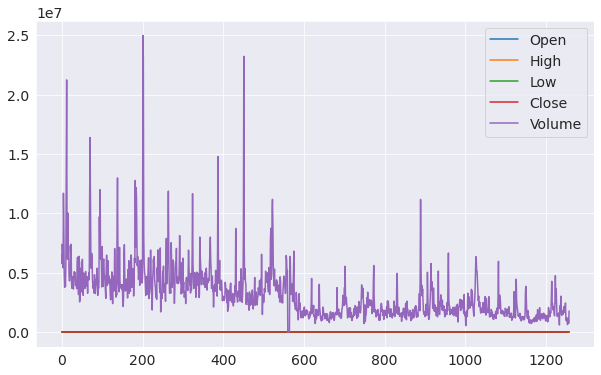

In [16]:
googledata_df.plot()
plt.show()

In [17]:
feature_config = sv.FeatureConfig(force_num=['Open', 'High', 'Low', 'Close', 'Volume'])

In [18]:
#report = sv.analyze(googledata_df, target_feat='Volume', feat_cfg=feature_config)


In [19]:
#report.show_notebook()

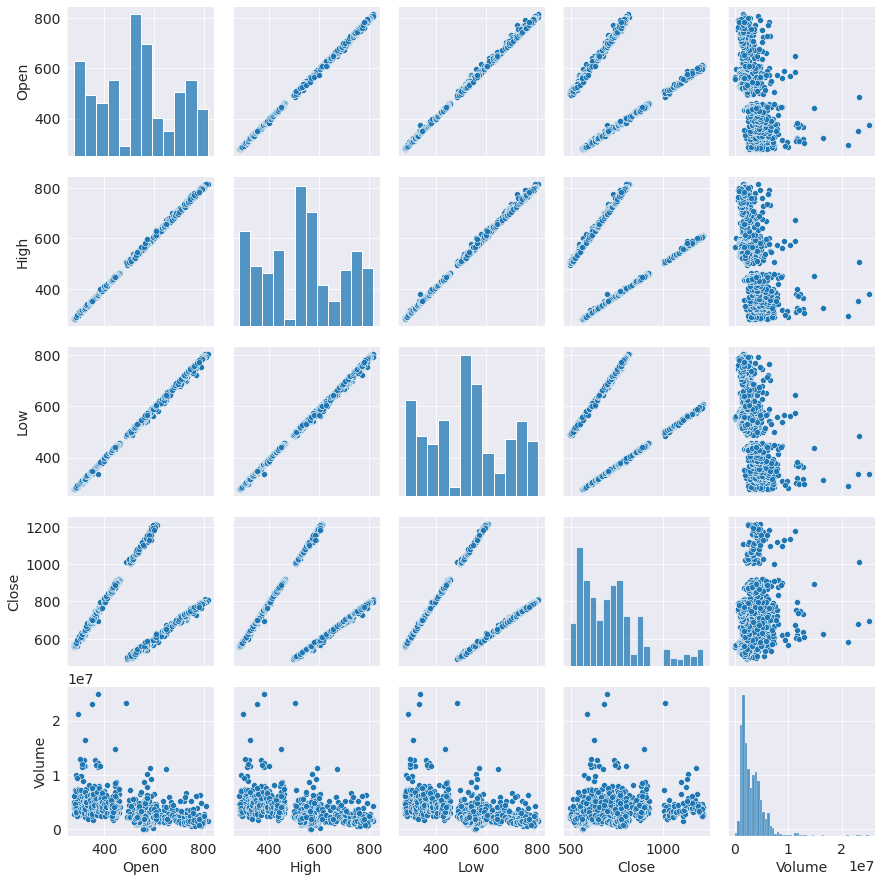

In [20]:
#Pair Grid
sns.pairplot(googledata_df)

In [21]:
print(googledata_df.shape)

(1258, 6)


In [22]:
googledata_df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


In [23]:
googledata_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## Investigating Outliers

2012-01-03    1
2015-04-30    1
2015-05-11    1
2015-05-08    1
2015-05-07    1
             ..
2013-09-04    1
2013-09-03    1
2013-08-30    1
2013-08-29    1
2016-12-30    1
Name: Date, Length: 1258, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


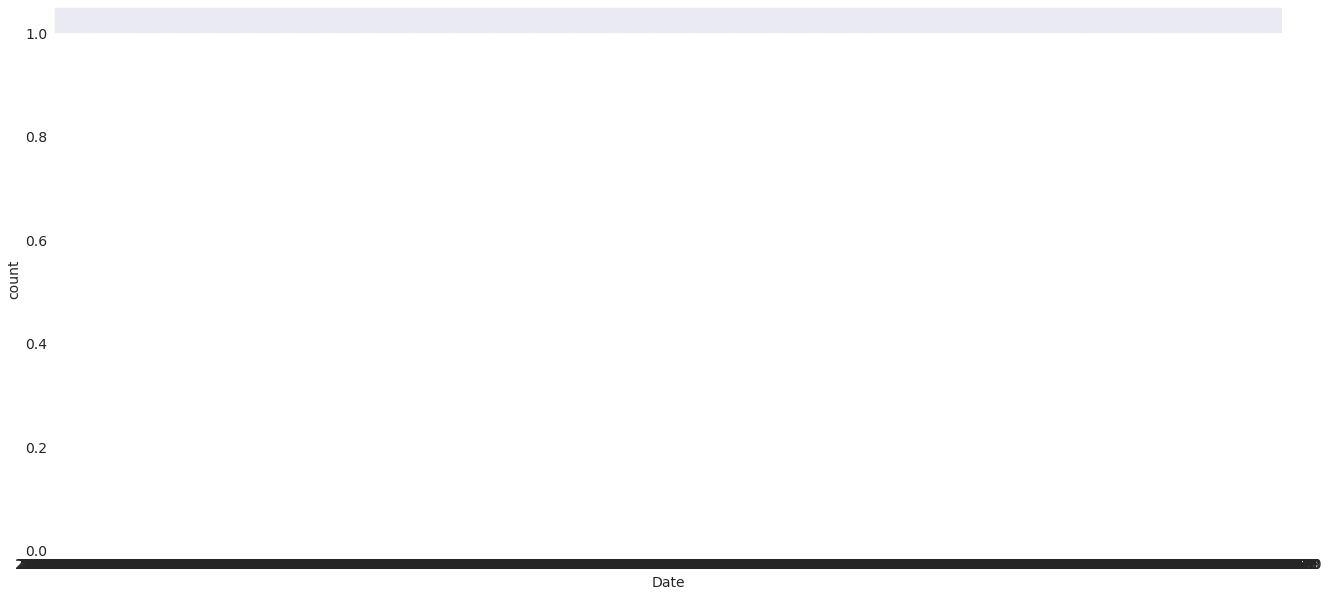

780.00    3
306.35    3
579.41    2
521.08    2
441.08    2
         ..
446.43    1
445.58    1
447.02    1
442.61    1
782.75    1
Name: Open, Length: 1215, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


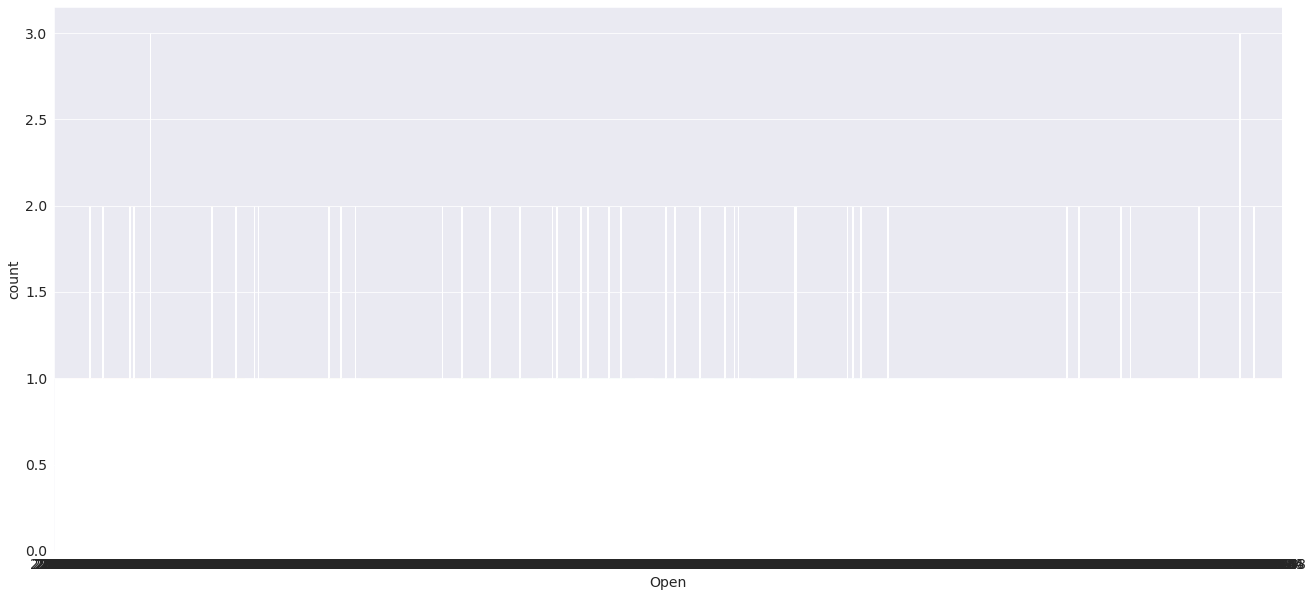

437.36    3
401.99    3
448.82    2
553.48    2
303.27    2
         ..
442.54    1
446.83    1
446.17    1
447.27    1
782.78    1
Name: High, Length: 1219, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


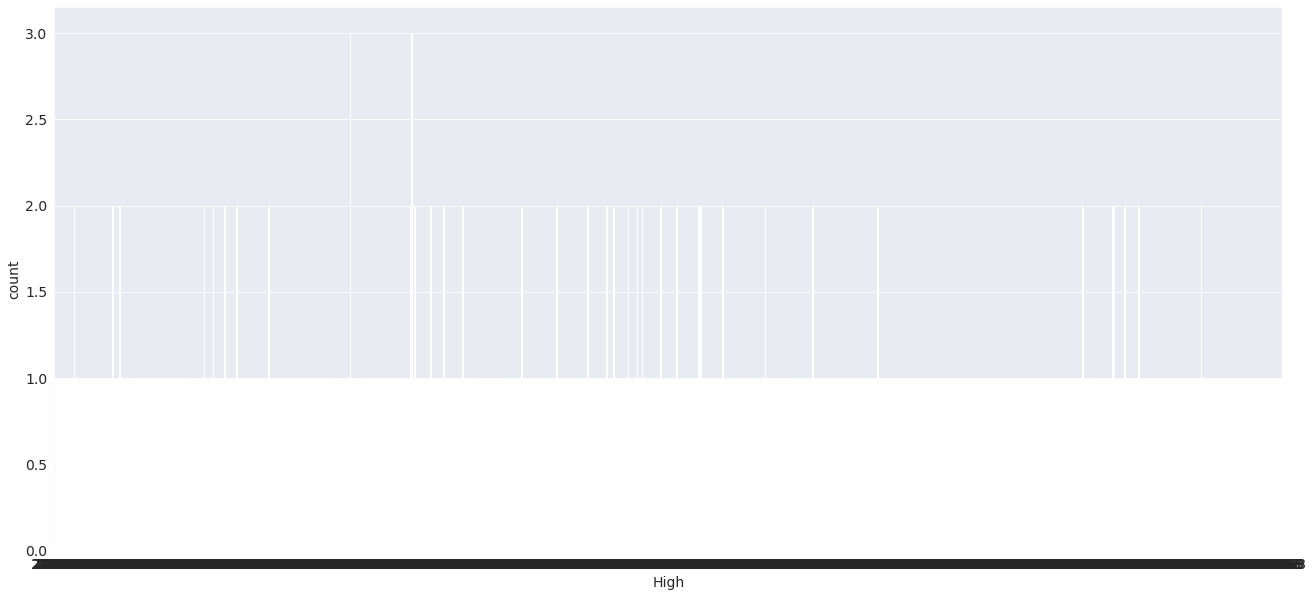

737.00    3
309.46    3
441.39    2
435.37    2
511.08    2
         ..
440.77    1
439.56    1
435.24    1
434.18    1
770.41    1
Name: Low, Length: 1223, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


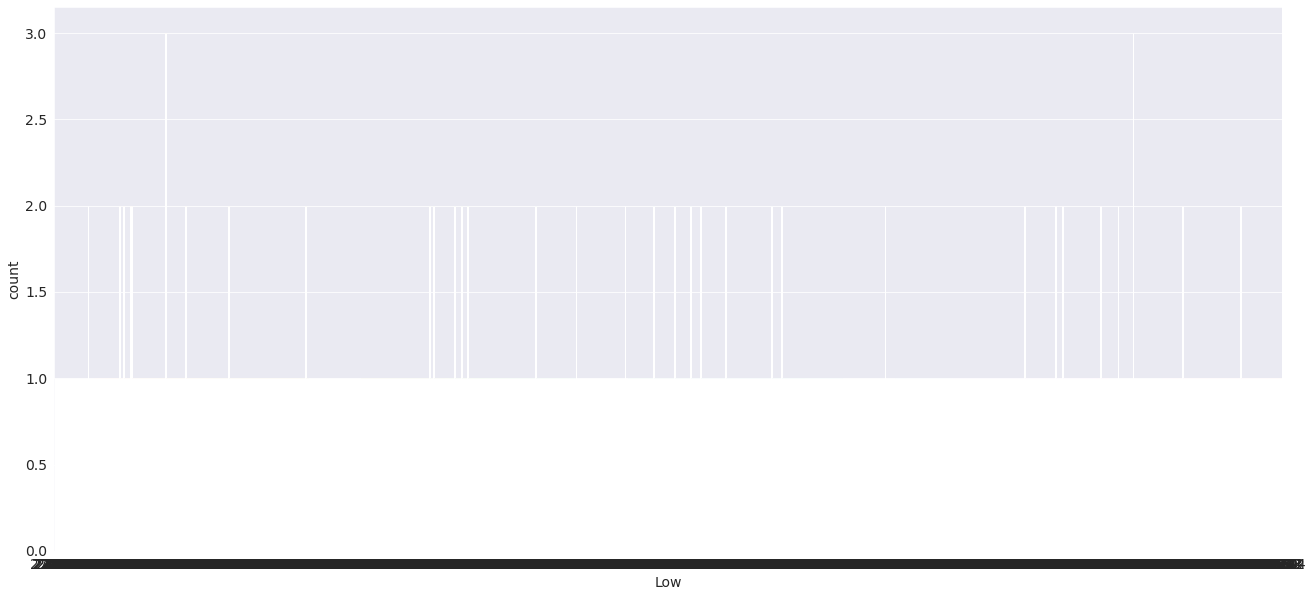

718.81    2
721.27    2
783.22    2
629.25    2
697.77    2
         ..
844.58    1
853.09    1
846.23    1
847.82    1
771.82    1
Name: Close, Length: 1241, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


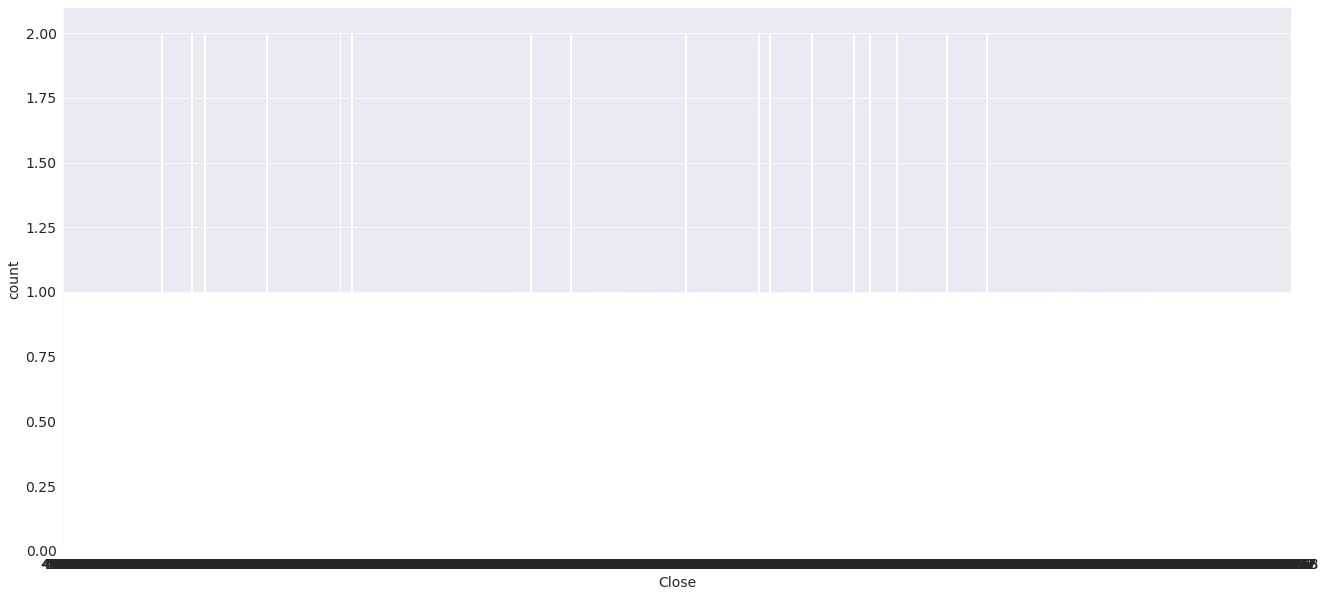

3686400.0    2
1645300.0    2
1572600.0    2
2104100.0    2
4199700.0    2
            ..
4097600.0    1
4110400.0    1
3737100.0    1
2968000.0    1
1770000.0    1
Name: Volume, Length: 1240, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


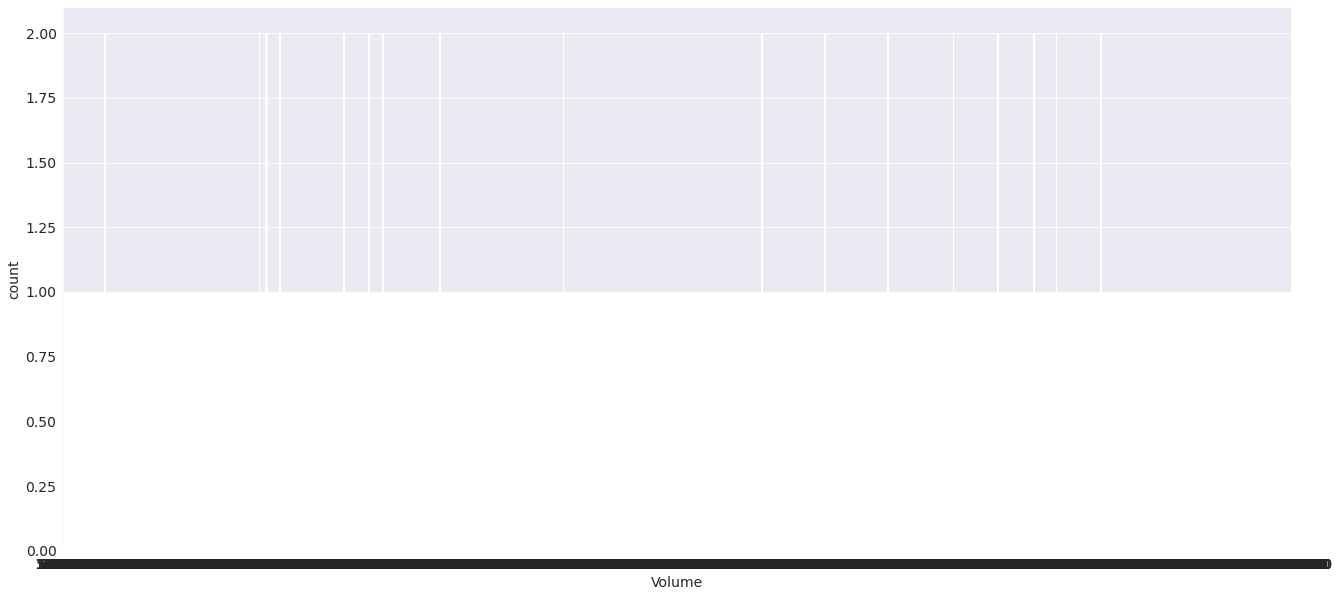

In [24]:
for columnname in columnnames:
  print(googledata_df[columnname].value_counts())
  plt.figure(figsize=(22,10))
  sns.countplot(googledata_df[columnname])
  plt.show()

In [25]:
googledata_df12= googledata_df.copy(deep=True)
googledata_df12.set_index('Date', inplace = True) #Set the date to the index
googledata_df12.head(12)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0
2012-01-10,313.70,315.72,307.30,621.43,8824000.0
2012-01-11,310.59,313.52,309.40,624.25,4817800.0
2012-01-12,314.43,315.26,312.08,627.92,3764400.0
2012-01-13,311.96,312.30,309.37,623.28,4631800.0


In [26]:
columnnames =['Open', 'High', 'Low', 'Close']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


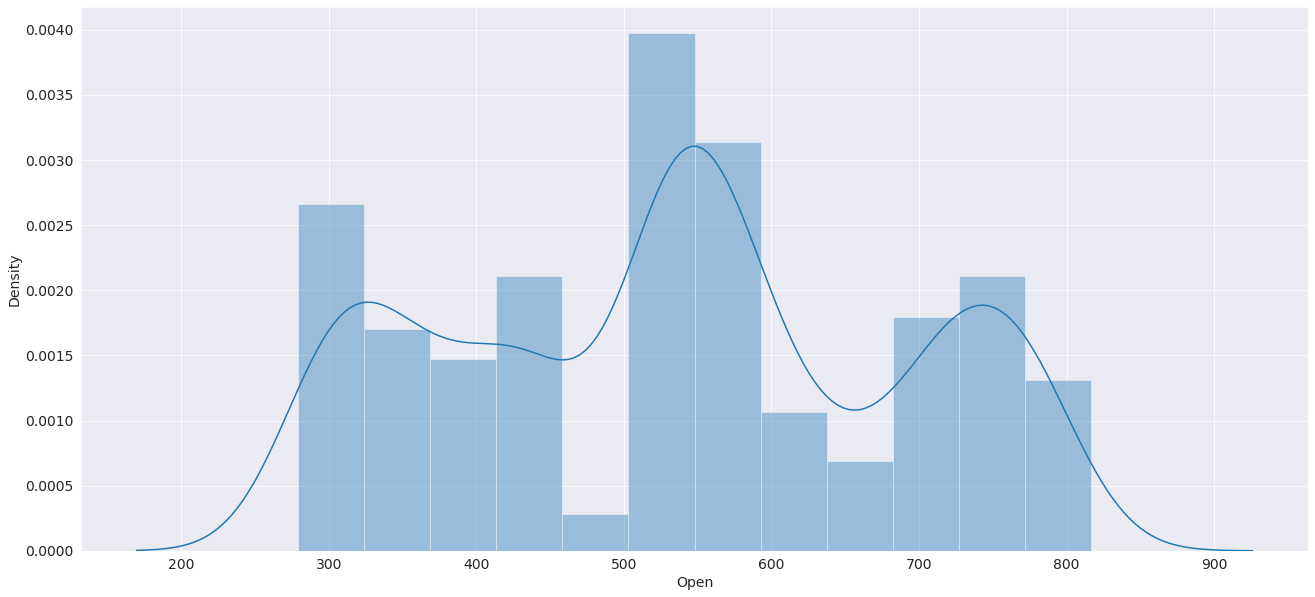

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


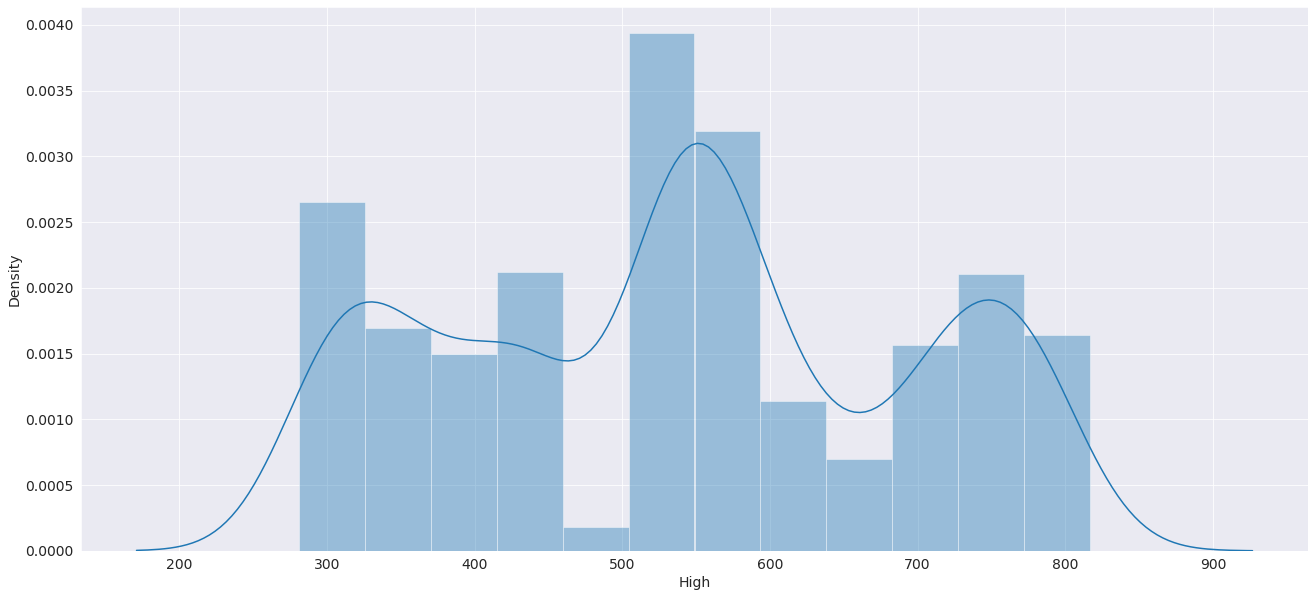

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


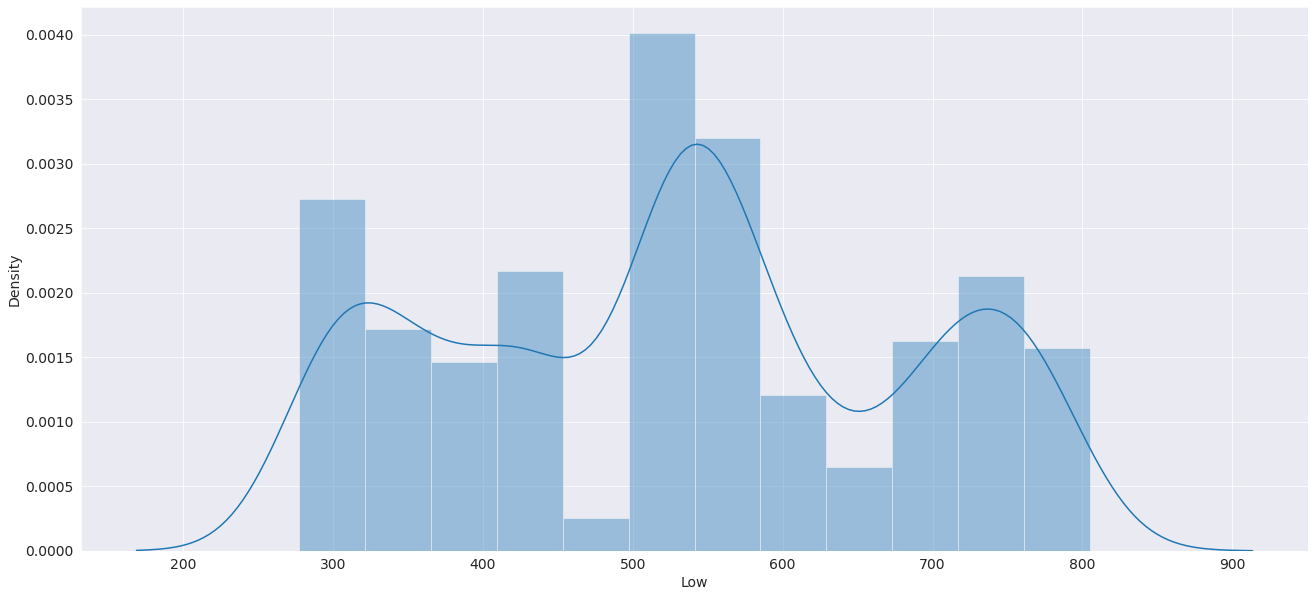

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


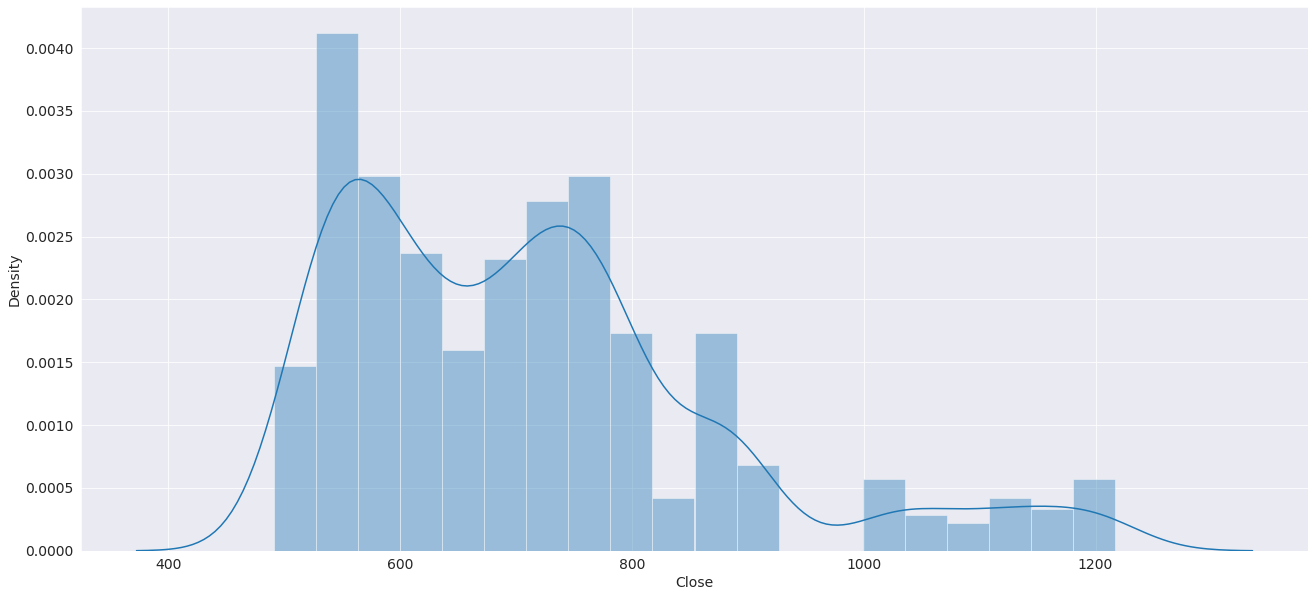

In [27]:
for columnname in columnnames:
  #print(googledata_df12[columnname].value_counts())
  plt.figure(figsize=(22,10))
  sns.distplot(googledata_df12[columnname])
  plt.show()

In [28]:
columnnames =list(googledata_df12.columns)

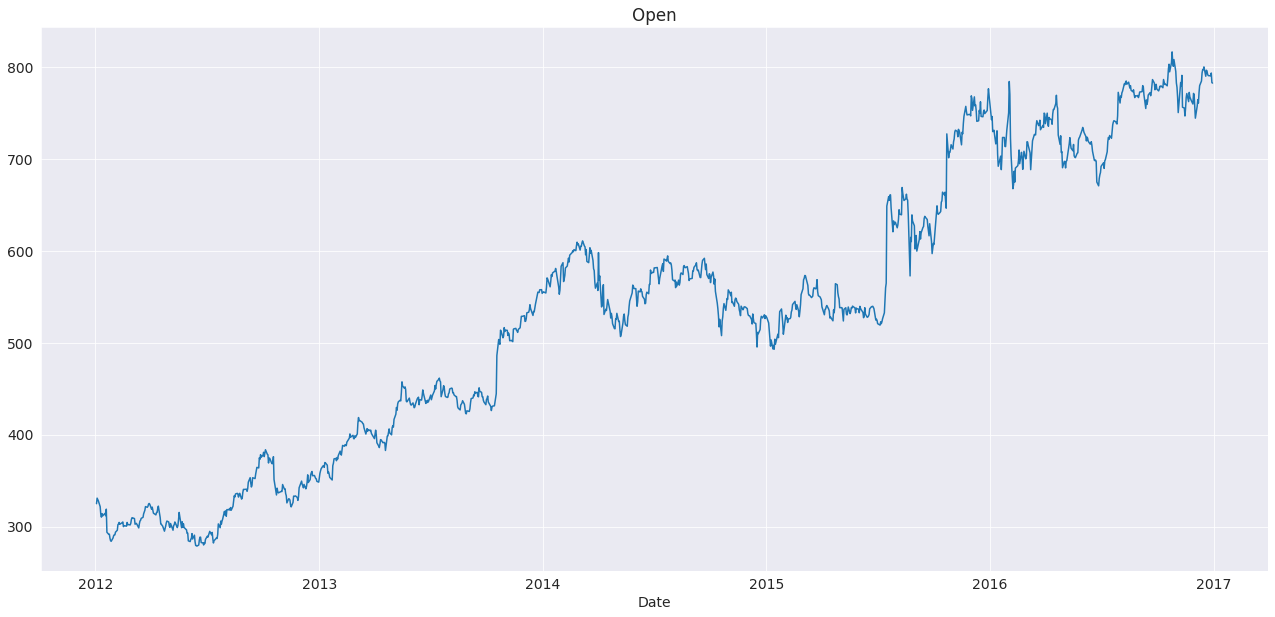

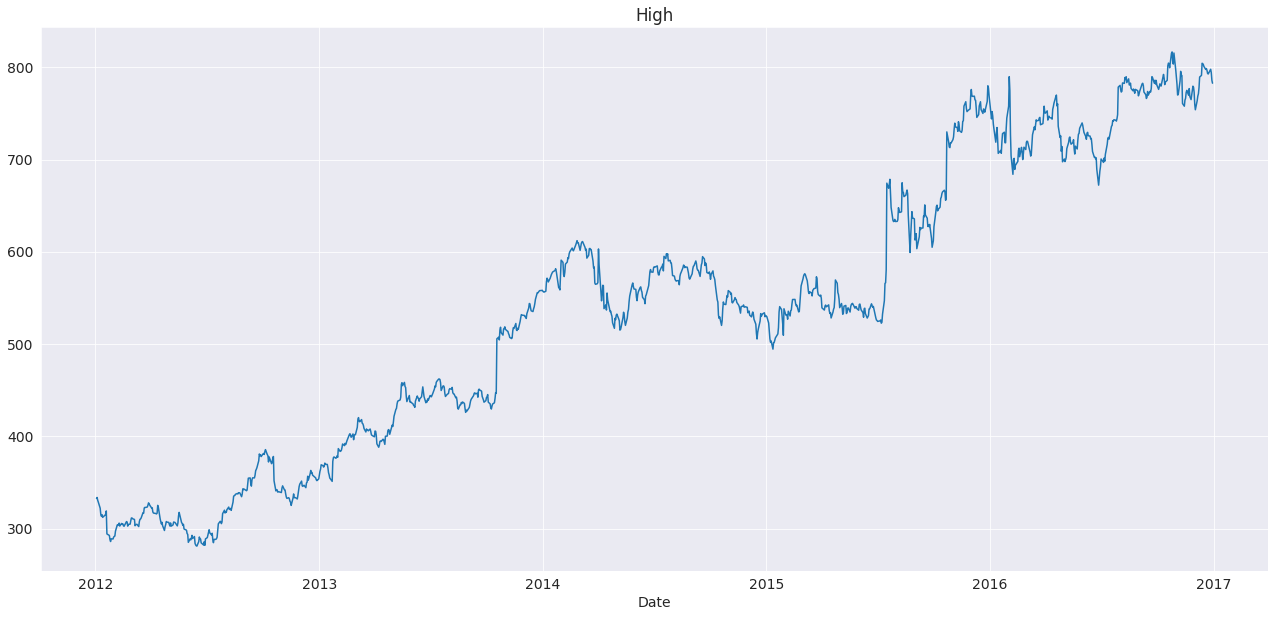

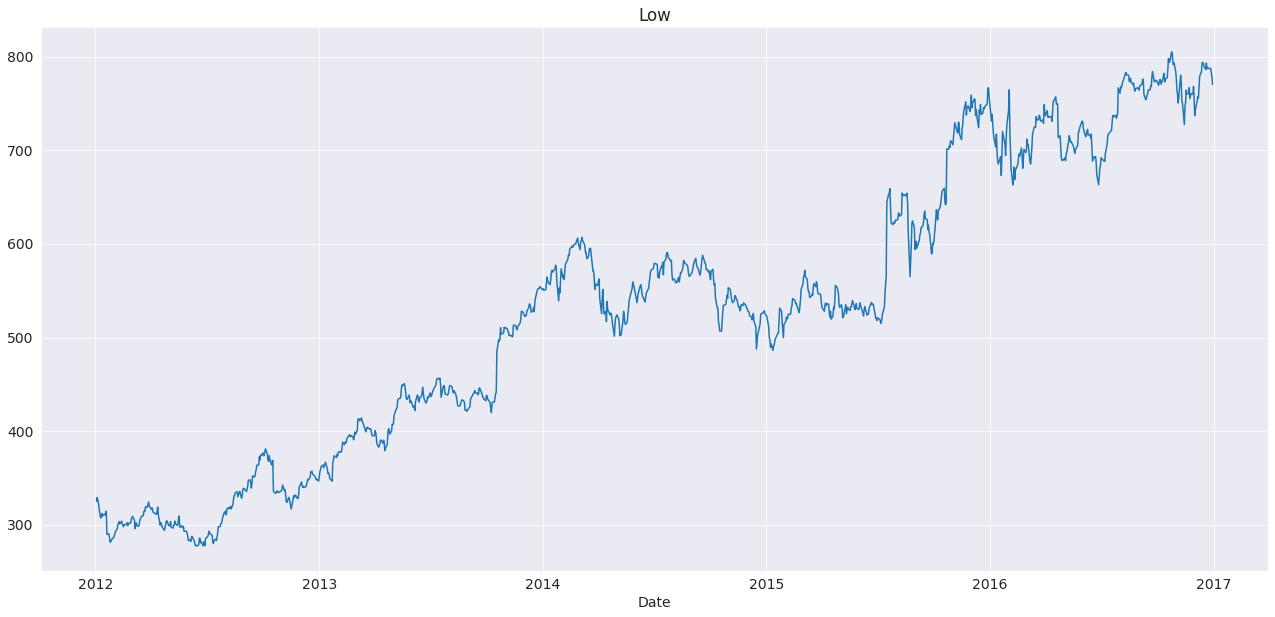

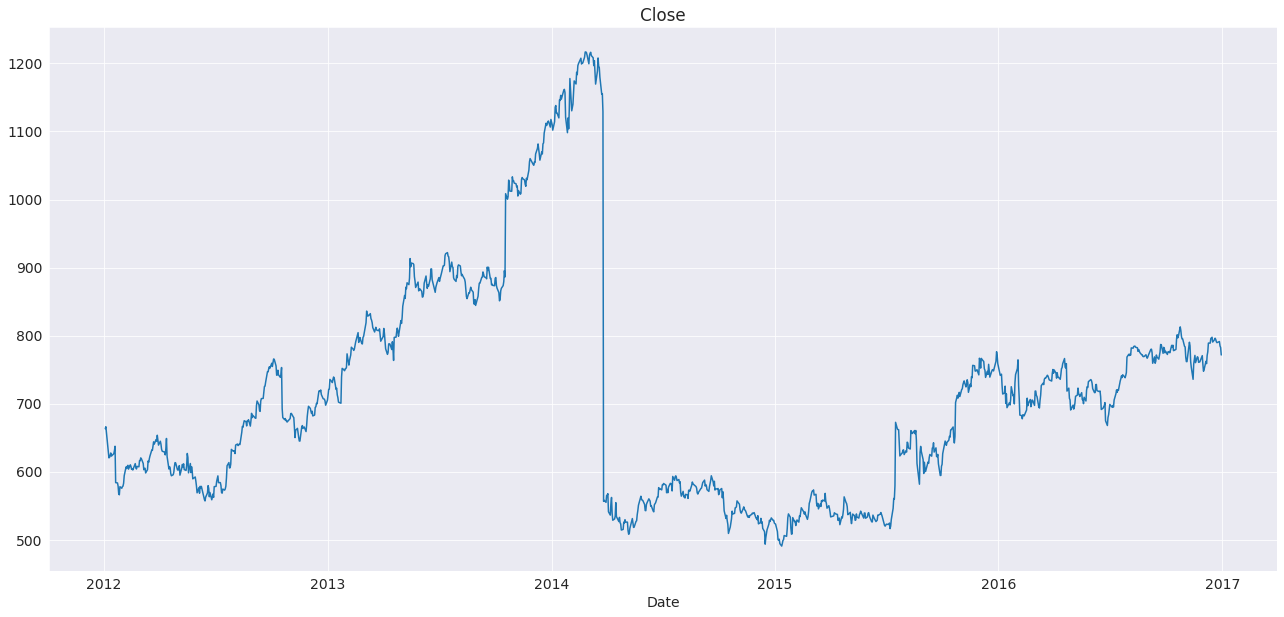

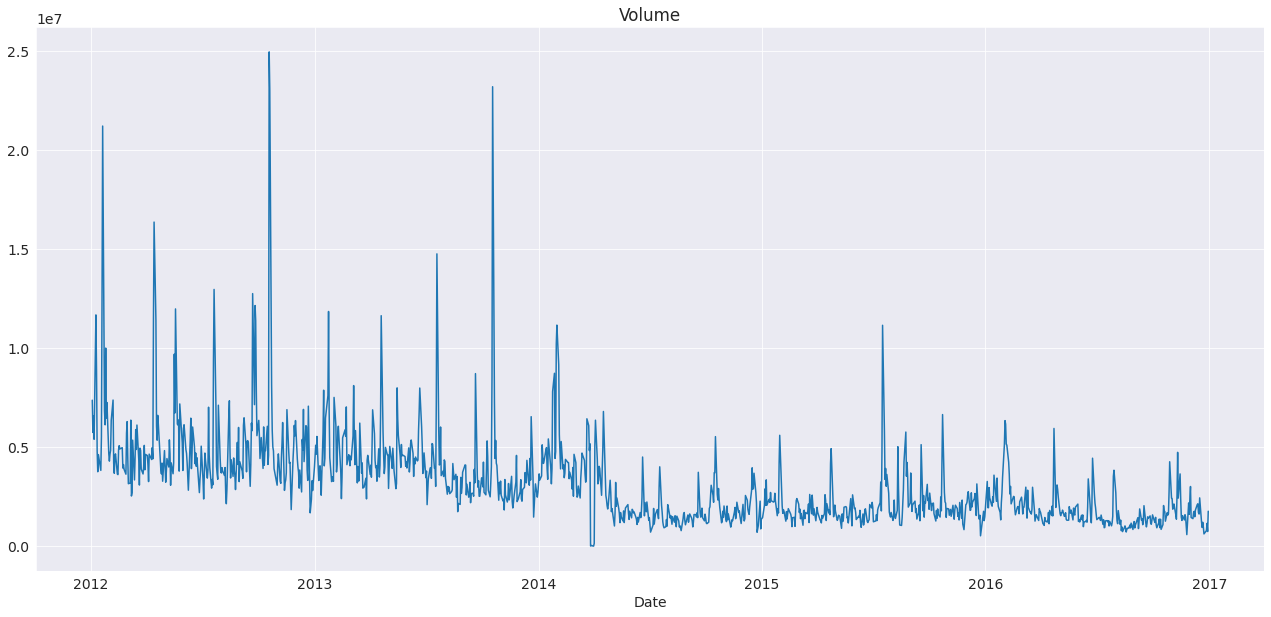

In [29]:
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  googledata_df12[columnname].plot()
  plt.title(columnname)
  plt.show()

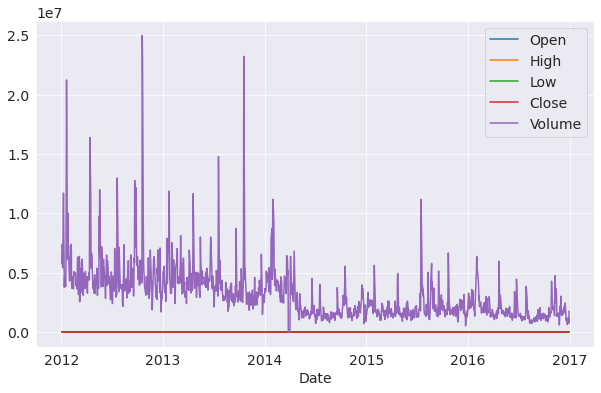

In [30]:
googledata_df12.plot()
plt.show()

## Investigating Missing Values

In [31]:
googledata_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [32]:
googledata_df.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

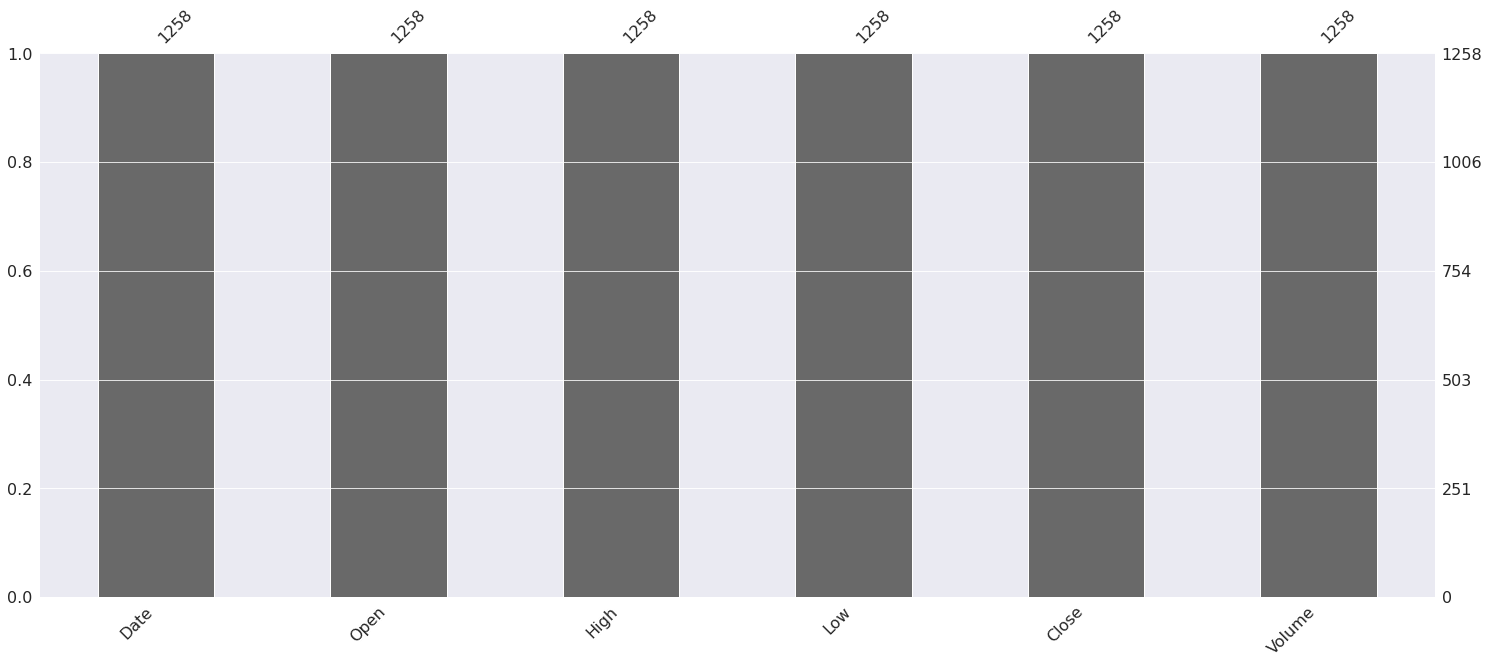

In [33]:
# Plot amount of missingness
msno.bar(googledata_df) # you can see pandas-profilin count part

plt.show()

#Data Preprocessing


*  Missing Value Treatment
*  Treating Outlier




## Missing Value Treatment

In [34]:
### Forward Fill
# Impute data DataFrame with ffill and bfill method
googledata_df_bfill_imputed = googledata_df.copy(deep=True)

googledata_df_bfill_imputed.fillna(method='ffill',inplace=True)
googledata_df_bfill_imputed.fillna(method='bfill',inplace=True)

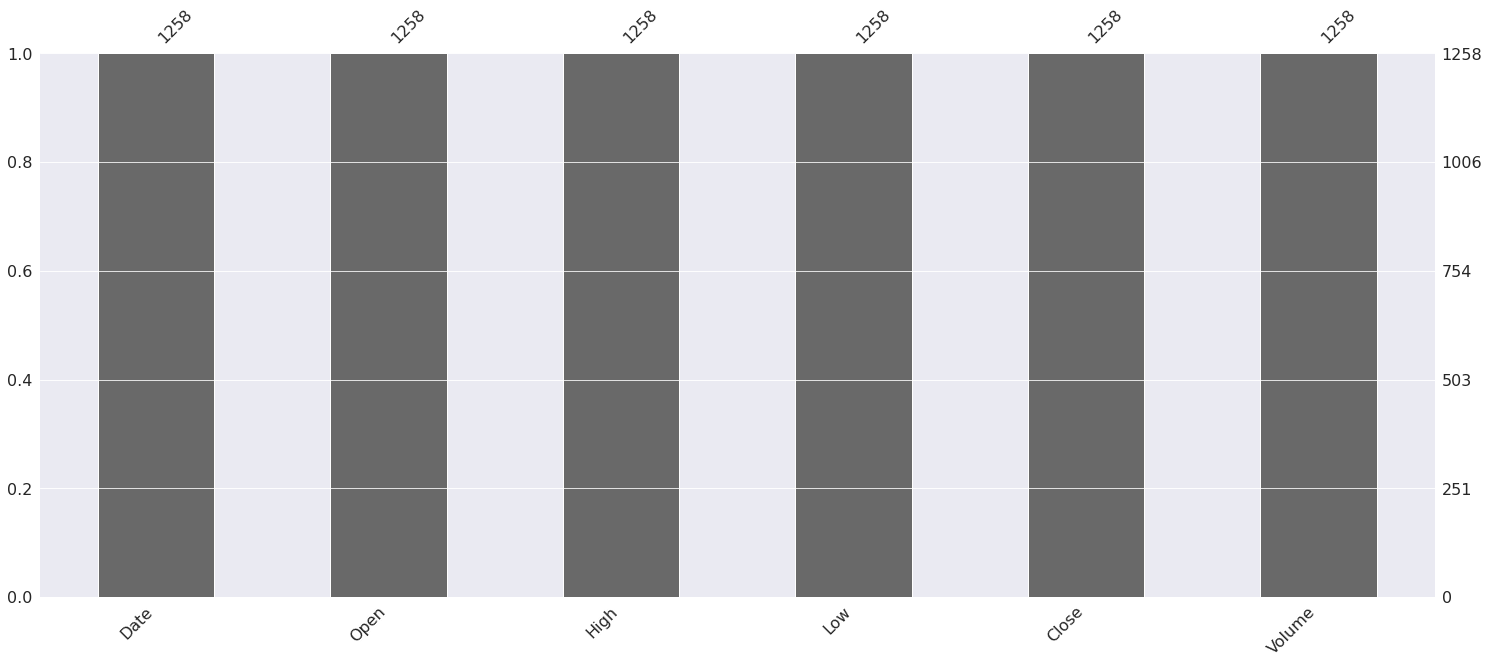

In [35]:
# Plot amount of missingness
msno.bar(googledata_df_bfill_imputed) # you can see pandas-profilin count part

plt.show()

In [36]:
googledata_df_bfill_imputed.head()

,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,7380500.0
1,2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2,2012-01-05,329.83,330.75,326.89,657.21,6590300.0
3,2012-01-06,328.34,328.77,323.68,648.24,5405900.0
4,2012-01-09,322.04,322.29,309.46,620.76,11688800.0


## Convert timestemps and dataset index

In [37]:
googledata_df_bfill_imputed_transformed = googledata_df_bfill_imputed.copy(deep=True)
googledata_df_bfill_imputed_transformed.set_index('Date', inplace = True) #Set the date to the index
googledata_df_bfill_imputed_transformed.head(12)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0
2012-01-10,313.70,315.72,307.30,621.43,8824000.0
2012-01-11,310.59,313.52,309.40,624.25,4817800.0
2012-01-12,314.43,315.26,312.08,627.92,3764400.0
2012-01-13,311.96,312.30,309.37,623.28,4631800.0


In [38]:
columnnames=list(googledata_df_bfill_imputed_transformed.columns)
print(columnnames)

['Open', 'High', 'Low', 'Close', 'Volume']


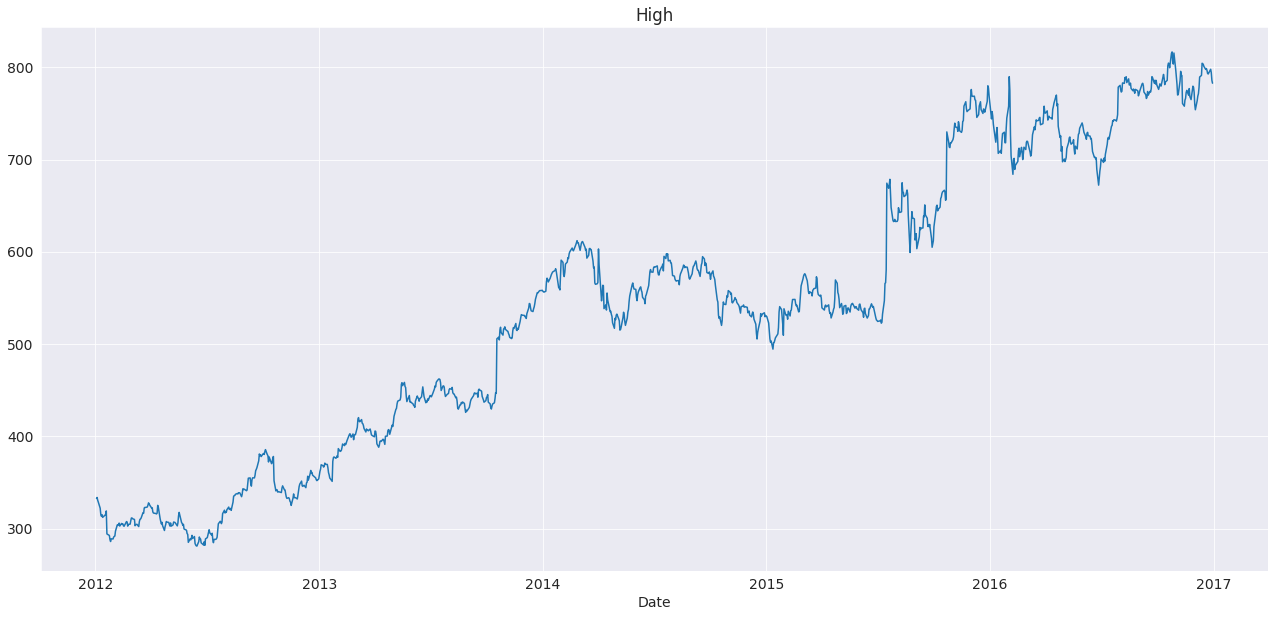

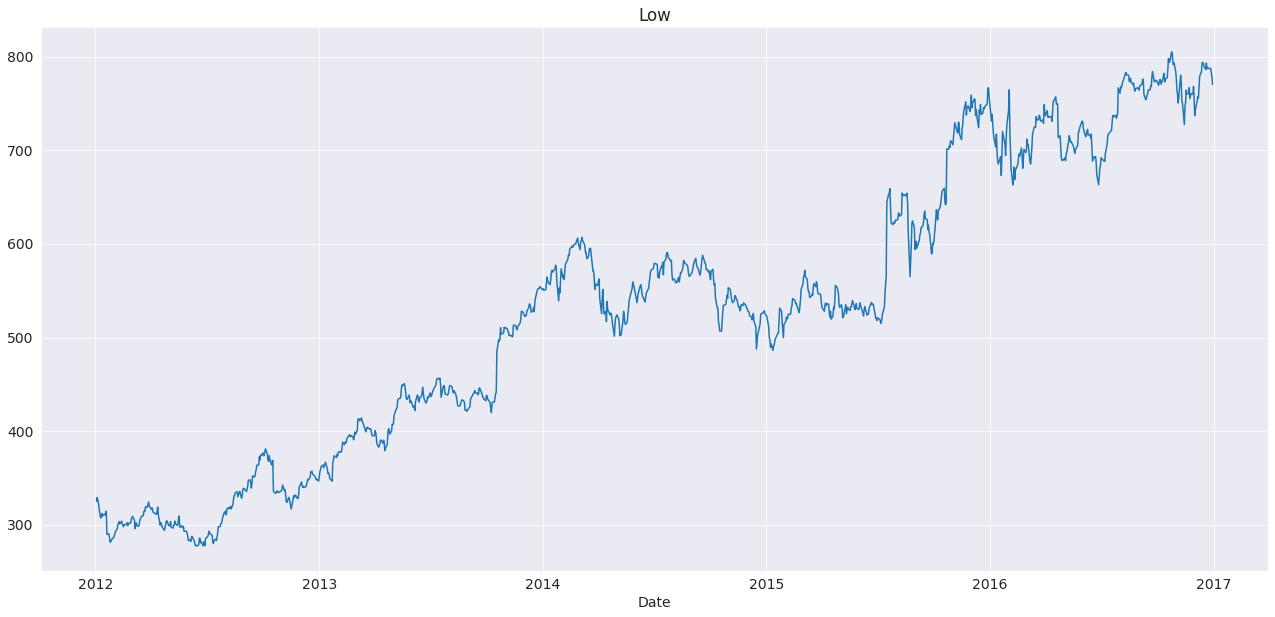

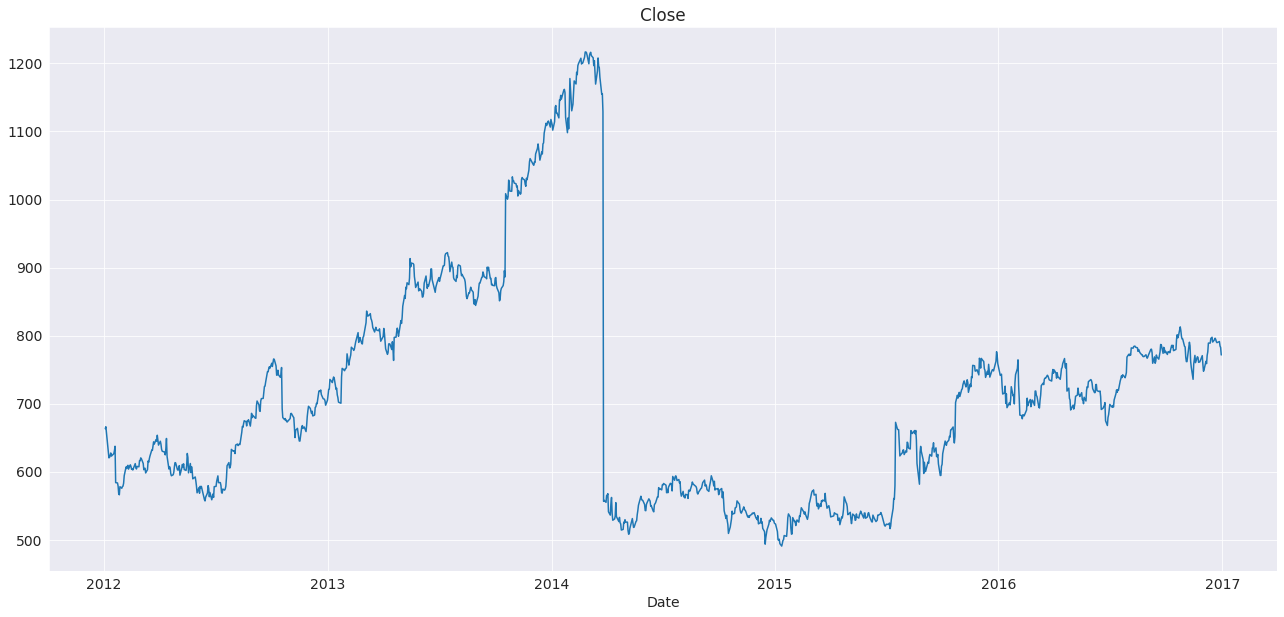

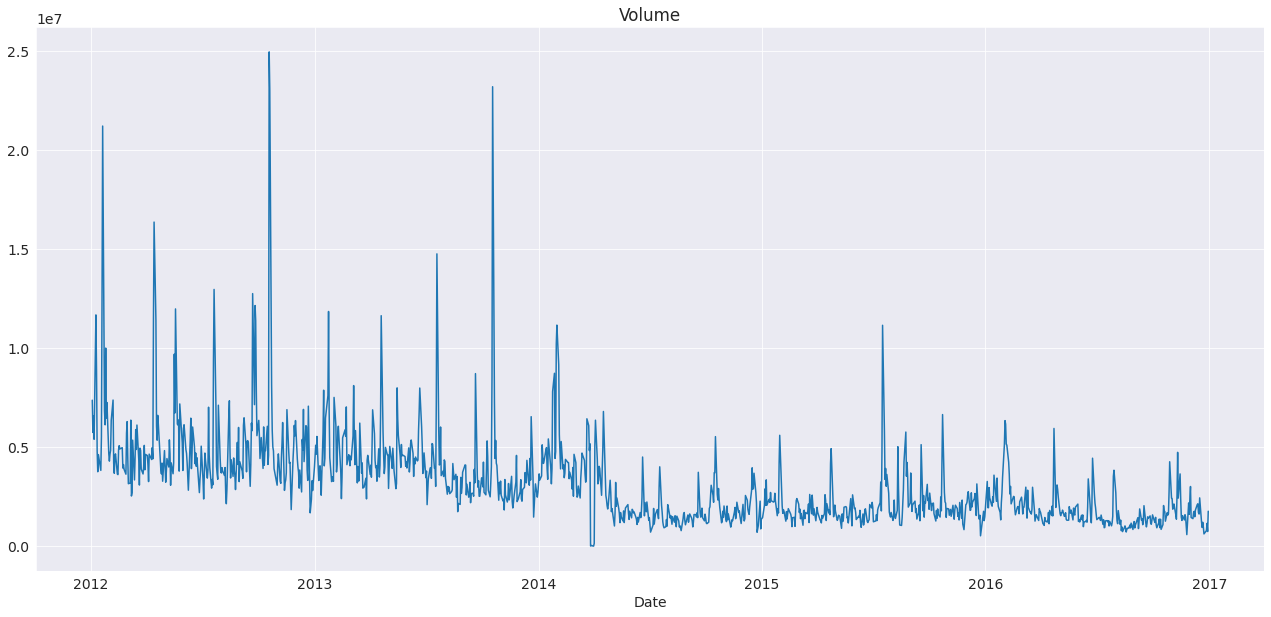

In [39]:
for columnname in columnnames[1:]:
  plt.figure(figsize=(22,10))
  googledata_df_bfill_imputed_transformed[columnname].plot()
  plt.title(columnname)
  plt.show()

In [40]:
ts = googledata_df_bfill_imputed_transformed

#Variables Selection
correlation matrix and heatmap
you can select  the Most correlated variables

In [41]:
googledata_df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999692,0.999498,0.125832,-0.530506
High,0.999692,1.000000,0.999480,0.124351,-0.526936
Low,0.999498,0.999480,1.000000,0.129001,-0.538273
Close,0.125832,0.124351,0.129001,1.000000,0.192357
Volume,-0.530506,-0.526936,-0.538273,0.192357,1.000000


Correlation Matrix             Open      High       Low     Close    Volume
Open    1.000000  0.999692  0.999498  0.125832 -0.530506
High    0.999692  1.000000  0.999480  0.124351 -0.526936
Low     0.999498  0.999480  1.000000  0.129001 -0.538273
Close   0.125832  0.124351  0.129001  1.000000  0.192357
Volume -0.530506 -0.526936 -0.538273  0.192357  1.000000


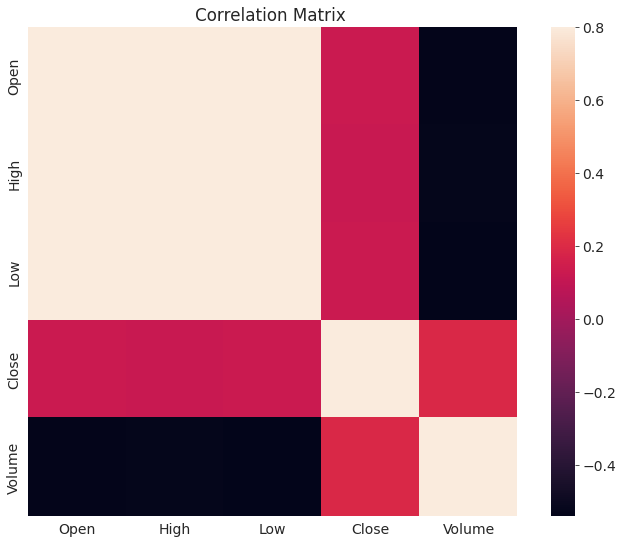

cols Index(['Volume', 'Close', 'High', 'Open', 'Low'], dtype='object')


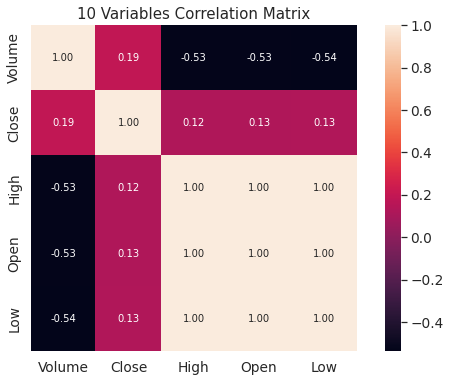

  Most Correlated Features
0                   Volume
1                    Close
2                     High
3                     Open
4                      Low


In [42]:
# Correlation Matrix Heatmap
corrmat = googledata_df_bfill_imputed.corr()
print("Correlation Matrix",corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title('Correlation Matrix ')
plt.show()
# Top 10 Heatmap
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'Volume')['Volume'].index
print("cols", cols)
cm = np.corrcoef(googledata_df_bfill_imputed[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                         yticklabels=cols.values, xticklabels=cols.values)
plt.title('10 Variables Correlation Matrix')
plt.show()
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
print(most_corr)
corrs = most_corr.values

In [43]:
most_corr_list=list(most_corr["Most Correlated Features"])

print(most_corr_list)


['Volume', 'Close', 'High', 'Open', 'Low']


In [44]:
ts.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0


In [45]:
#ts = ts.drop("Date",axis=1)

#Data Transformation



*   Convert timestemps and dataset into time series
*   Split data into traing and testing with ratio of 0.2



In [46]:
c=ts.size
idd=c/2
idd=int(idd)

In [47]:
train_data= ts[:int(0.5*(len(ts)))]
test_data = ts[int(0.5*(len(ts))):]

In [48]:
train_data.shape

(629, 5)

In [49]:
test_data.shape

(629, 5)


# Forecasting





## ARIMA

### for "Open"

In [50]:
data=train_data['Open']

In [51]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Open'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2016.618
Method:                       css-mle   S.D. of innovations              6.003
Date:                Tue, 10 May 2022   AIC                           4041.237
Time:                        19:10:04   BIC                           4059.007
Sample:                             1   HQIC                          4048.140
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4086      0.233      1.754      0.080      -0.048       0.865
ar.L1.D.Open    -0.8990      0.058    -15.489      0.000      -1.013      -0.785
ma.L1.D.Open     0.8472      0.068     12.387      0.000       0.713       0.981
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1124           +0.0000j            1.1124            0.5000
MA.1           -1.1803           +0.0000j            1.1803            0.5000
-----------------------------------------------------------------------------
"""

In [52]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

,0
Date,
2012-01-04,5.611401
2012-01-05,-1.492958
2012-01-06,-2.307897
2012-01-09,-6.473659
2012-01-10,-9.321955


<Figure size 1584x720 with 0 Axes>

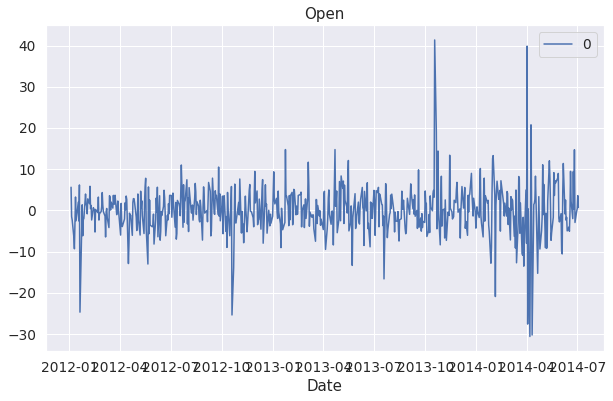

In [53]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Open')
plt.show()

In [54]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=googledata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2014-07-07    583.114650
2014-07-08    582.663795
2014-07-09    583.845012
2014-07-10    583.559057
2014-07-11    584.592034
                 ...    
2016-12-23    837.627940
2016-12-27    838.036539
2016-12-28    838.445138
2016-12-29    838.853737
2016-12-30    839.262336
Length: 629, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


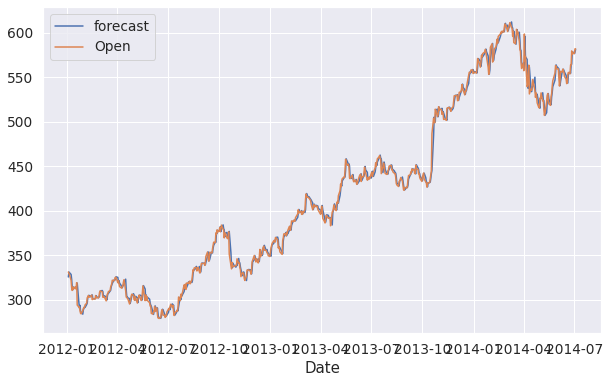

In [55]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['Open'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['Open'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



model_accuracy(pred, test_data['Open'])



MSE: 5860.044006303973


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.9741576586874252,
 'corr': 0.8874717853485938,
 'mae': 63.78068478479266,
 'mape': 0.10734837562077972,
 'me': 61.00082761712027,
 'minmax': 0.09211443201548819,
 'mpe': 0.10364561838955068,
 'rmse': 76.55092426812345}

In [57]:
modelo2=ARIMA(train_data['Open'],order=(1,1,1))
modelo2=modelo2.fit()
googledata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,623400.0
2016-12-27,790.68,797.86,787.66,791.55,789100.0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0
2016-12-29,783.33,785.93,778.92,782.79,744300.0
2016-12-30,782.75,782.78,770.41,771.82,1770000.0


In [58]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2016-12-31',end='2017-02-09')
#print(index_future_dates)
predmo2=modelo2.predict(start=1,end=41,typ='levels').rename('ARIMA 41 Day Prediction')
predmo2.index=index_future_dates
print(predmo2)

2016-12-31    325.658599
2017-01-01    331.322958
2017-01-02    330.647897
2017-01-03    328.513659
2017-01-04    323.021955
2017-01-05    314.103476
2017-01-06    311.192530
2017-01-07    314.491792
2017-01-08    312.814133
2017-01-09    314.713255
2017-01-10    313.137457
2017-01-11    318.857952
2017-01-12    296.618080
2017-01-13    290.720715
2017-01-14    293.845041
2017-01-15    287.179781
2017-01-16    286.262658
2017-01-17    283.989510
2017-01-18    288.817994
2017-01-19    290.323227
2017-01-20    292.179236
2017-01-21    291.440854
2017-01-22    294.770950
2017-01-23    296.595862
2017-01-24    302.728527
2017-01-25    303.673185
2017-01-26    305.140650
2017-01-27    303.463170
2017-01-28    304.265280
2017-01-29    305.247458
2017-01-30    305.537091
2017-01-31    301.132689
2017-02-01    301.357621
2017-02-02    301.616380
2017-02-03    304.724264
2017-02-04    303.371734
2017-02-05    302.458415
2017-02-06    303.024692
2017-02-07    303.815381
2017-02-08    308.732330


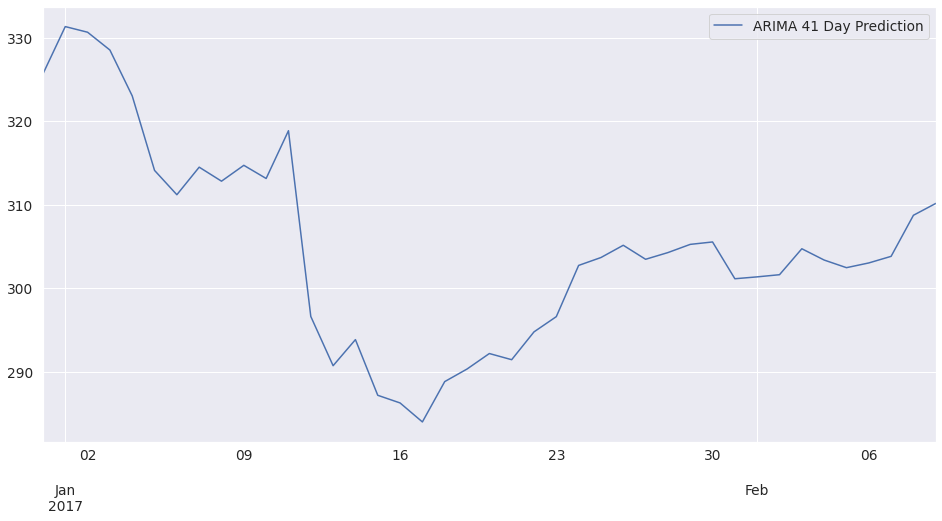

In [59]:
# ploting the prediction
predmo2.plot(figsize=(16,8),legend=True)


### For "High"

In [60]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['High'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1968.929
Method:                       css-mle   S.D. of innovations              5.564
Date:                Tue, 10 May 2022   AIC                           3945.857
Time:                        19:10:07   BIC                           3963.627
Sample:                             1   HQIC                          3952.761
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3990      0.242      1.647      0.100      -0.076       0.874
ar.L1.D.High    -0.0195      0.253     -0.077      0.939      -0.515       0.476
ma.L1.D.High     0.1128      0.249      0.453      0.651      -0.376       0.601
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -51.3561           +0.0000j           51.3561            0.5000
MA.1           -8.8613           +0.0000j            8.8613            0.5000
-----------------------------------------------------------------------------
"""

In [61]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

,0
Date,
2012-01-04,0.640962
2012-01-05,-3.578264
2012-01-06,-2.043798
2012-01-09,-6.694720
2012-01-10,-6.347488


<Figure size 1584x720 with 0 Axes>

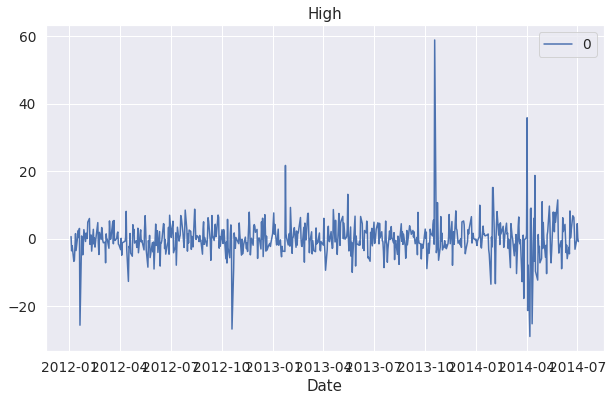

In [62]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('High')
plt.show()

In [63]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=googledata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2014-07-07    583.730173
2014-07-08    584.130747
2014-07-09    584.529755
2014-07-10    584.928793
2014-07-11    585.327831
                 ...    
2016-12-23    832.731308
2016-12-27    833.130346
2016-12-28    833.529384
2016-12-29    833.928422
2016-12-30    834.327460
Length: 629, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


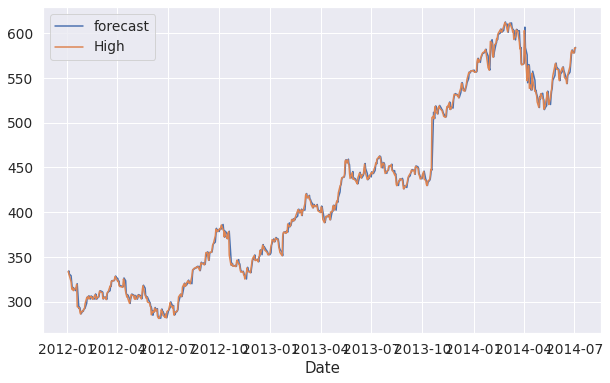

In [64]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['High'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['High'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



model_accuracy(pred, test_data['High'])

MSE: 5119.203045471468


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.9805407915561638,
 'corr': 0.8881343983336444,
 'mae': 58.100203175928286,
 'mape': 0.09781376452766377,
 'me': 53.8996786906624,
 'minmax': 0.0844504607970048,
 'mpe': 0.09222914357560916,
 'rmse': 71.54860617420482}

In [66]:
modelh2=ARIMA(train_data['High'],order=(0,1,1))
modelh2=modelh2.fit()
googledata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,623400.0
2016-12-27,790.68,797.86,787.66,791.55,789100.0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0
2016-12-29,783.33,785.93,778.92,782.79,744300.0
2016-12-30,782.75,782.78,770.41,771.82,1770000.0


In [67]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2016-12-31',end='2017-02-09')
#print(index_future_dates)
predmh2=modelh2.predict(start=1,end=41,typ='levels').rename('ARIMA 41 Day Prediction')
predmh2.index=index_future_dates
print(predmh2)

2016-12-31    333.229028
2017-01-01    334.328650
2017-01-02    330.813247
2017-01-03    328.977298
2017-01-04    322.061518
2017-01-05    315.523964
2017-01-06    313.730984
2017-01-07    315.802506
2017-01-08    312.370367
2017-01-09    315.437954
2017-01-10    316.254878
2017-01-11    319.984771
2017-01-12    292.398250
2017-01-13    293.707077
2017-01-14    293.048282
2017-01-15    288.220653
2017-01-16    286.376603
2017-01-17    289.732705
2017-01-18    289.242767
2017-01-19    291.465475
2017-01-20    292.077282
2017-01-21    292.512099
2017-01-22    298.279567
2017-01-23    305.231148
2017-01-24    303.802214
2017-01-25    304.997321
2017-01-26    306.602500
2017-01-27    302.984415
2017-01-28    306.430417
2017-01-29    305.111666
2017-01-30    305.738578
2017-01-31    303.437386
2017-02-01    303.007958
2017-02-02    308.637757
2017-02-03    307.507868
2017-02-04    302.790075
2017-02-05    305.256372
2017-02-06    305.418725
2017-02-07    309.439746
2017-02-08    312.234554


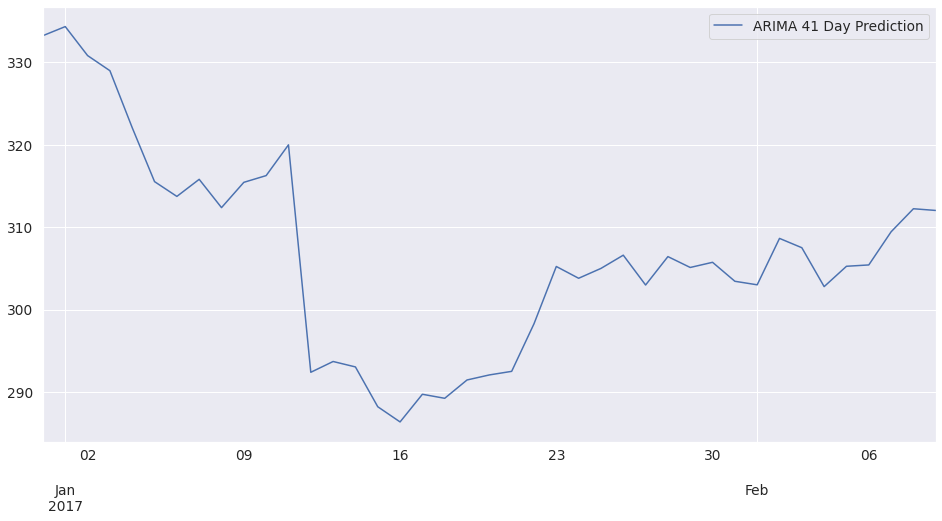

In [68]:
# ploting the prediction
predmh2.plot(figsize=(16,8),legend=True)


## For "Low"

In [69]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Low'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Low   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1947.365
Method:                       css-mle   S.D. of innovations              5.376
Date:                Tue, 10 May 2022   AIC                           3902.731
Time:                        19:10:09   BIC                           3920.501
Sample:                             1   HQIC                          3909.634
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4057      0.236      1.716      0.087      -0.058       0.869
ar.L1.D.Low    -0.2185      0.250     -0.875      0.382      -0.708       0.271
ma.L1.D.Low     0.3429      0.240      1.431      0.153      -0.127       0.813
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.5760           +0.0000j            4.5760            0.5000
MA.1           -2.9161           +0.0000j            2.9161            0.5000
-----------------------------------------------------------------------------
"""

In [70]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

,0
Date,
2012-01-04,3.704342
2012-01-05,-3.036142
2012-01-06,-3.143675
2012-01-09,-14.337987
2012-01-10,-0.845098


<Figure size 1584x720 with 0 Axes>

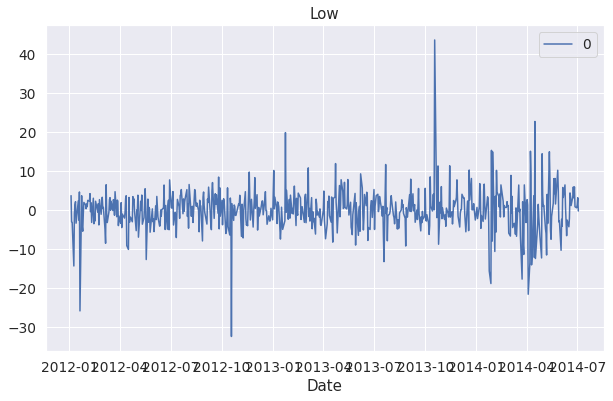

In [71]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Low')
plt.show()

In [72]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=googledata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2014-07-07    579.627701
2014-07-08    580.056951
2014-07-09    580.457454
2014-07-10    580.864239
2014-07-11    581.269651
                 ...    
2016-12-23    832.777843
2016-12-27    833.183501
2016-12-28    833.589159
2016-12-29    833.994818
2016-12-30    834.400476
Length: 629, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


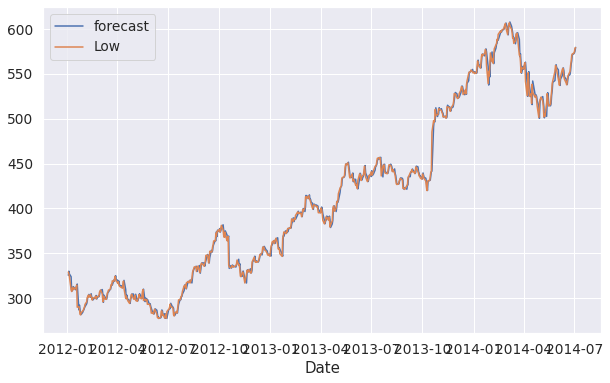

In [73]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['Low'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['Low'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



model_accuracy(pred, test_data['Low'])



MSE: 6051.500499111391


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.9788824556903134,
 'corr': 0.8886743071513713,
 'mae': 65.05156969175869,
 'mape': 0.1104591237101967,
 'me': 62.8585926296098,
 'minmax': 0.09450207718463322,
 'mpe': 0.10750875114563271,
 'rmse': 77.7913909061369}

In [75]:
modell2=ARIMA(train_data['Low'],order=(0,1,1))
modell2=modell2.fit()
googledata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,623400.0
2016-12-27,790.68,797.86,787.66,791.55,789100.0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0
2016-12-29,783.33,785.93,778.92,782.79,744300.0
2016-12-30,782.75,782.78,770.41,771.82,1770000.0


In [76]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2016-12-31',end='2017-02-09')
#print(index_future_dates)
predml2=modell2.predict(start=1,end=41,typ='levels').rename('ARIMA 40 Day Prediction')
predml2.index=index_future_dates
print(predml2)

2016-12-31    325.375792
2017-01-01    329.952322
2017-01-02    326.903889
2017-01-03    323.673105
2017-01-04    308.046377
2017-01-05    307.610249
2017-01-06    310.034898
2017-01-07    312.747585
2017-01-08    309.343429
2017-01-09    312.373616
2017-01-10    309.989145
2017-01-11    315.539626
2017-01-12    286.865750
2017-01-13    291.359731
2017-01-14    287.885473
2017-01-15    281.799036
2017-01-16    281.551670
2017-01-17    284.267998
2017-01-18    286.210142
2017-01-19    286.942897
2017-01-20    289.093837
2017-01-21    290.465390
2017-01-22    293.651286
2017-01-23    296.593649
2017-01-24    301.687846
2017-01-25    301.588464
2017-01-26    303.992566
2017-01-27    300.876074
2017-01-28    304.659044
2017-01-29    301.219402
2017-01-30    300.418899
2017-01-31    297.814147
2017-02-01    300.775843
2017-02-02    300.656160
2017-02-03    302.825979
2017-02-04    298.972430
2017-02-05    302.364707
2017-02-06    301.682301
2017-02-07    303.247348
2017-02-08    307.434964


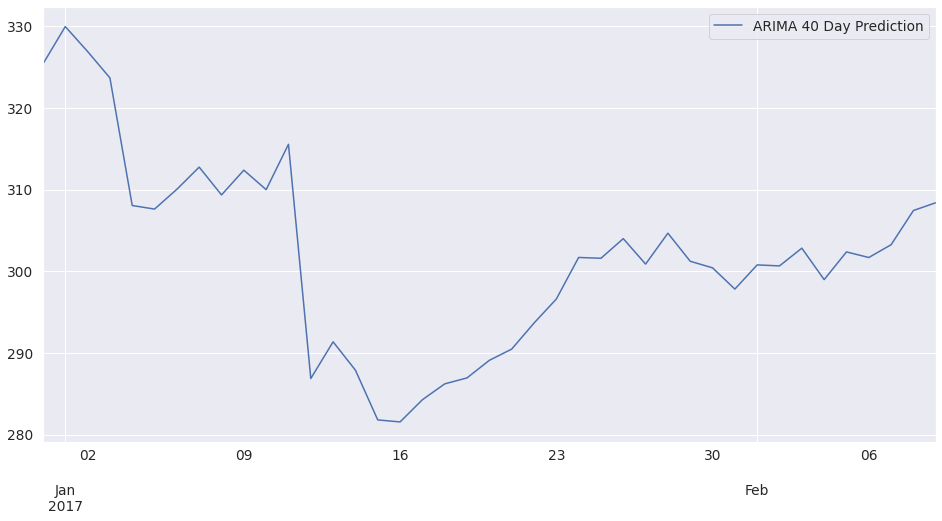

In [77]:
# ploting the prediction
predml2.plot(figsize=(16,8),legend=True)


## For "Close"

In [78]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2921.510
Method:                       css-mle   S.D. of innovations             25.359
Date:                Tue, 10 May 2022   AIC                           5851.020
Time:                        19:10:11   BIC                           5868.791
Sample:                             1   HQIC                          5857.924
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1278      1.036     -0.123      0.902      -2.158       1.903
ar.L1.D.Close    -0.3153      0.912     -0.346      0.730      -2.103       1.473
ma.L1.D.Close     0.3466      0.901      0.385      0.701      -1.420       2.113
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1718           +0.0000j            3.1718            0.5000
MA.1           -2.8848           +0.0000j            2.8848            0.5000
-----------------------------------------------------------------------------
"""

In [79]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

,0
Date,
2012-01-04,2.987754
2012-01-05,-9.204824
2012-01-06,-8.524776
2012-01-09,-27.185014
2012-01-10,1.597642


<Figure size 1584x720 with 0 Axes>

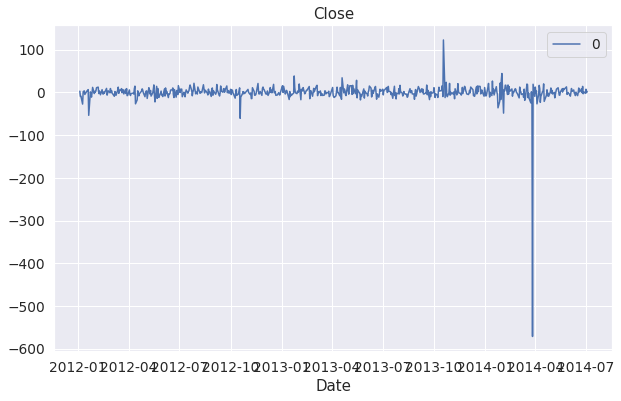

In [80]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Close')
plt.show()

In [81]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=googledata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2014-07-07    583.115903
2014-07-08    582.952315
2014-07-09    582.835859
2014-07-10    582.704544
2014-07-11    582.577913
                 ...    
2016-12-23    503.370281
2016-12-27    503.242527
2016-12-28    503.114774
2016-12-29    502.987020
2016-12-30    502.859266
Length: 629, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


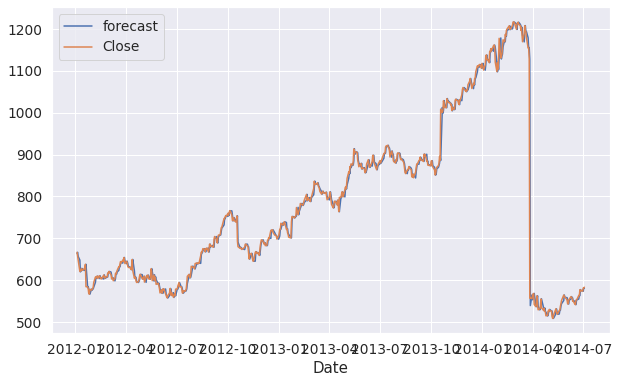

In [82]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['Close'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['Close'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



model_accuracy(pred, test_data['Close'])



MSE: 25336.07743851362


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.9944865300361303,
 'corr': -0.8884470812953514,
 'mae': 124.6546169896434,
 'mape': 0.17416433884619936,
 'me': -106.75083780837164,
 'minmax': 0.173041858614693,
 'mpe': -0.14024245713656117,
 'rmse': 159.1731052612646}

In [84]:
modelc2=ARIMA(train_data['Close'],order=(1,1,1))
modelc2=modelc2.fit()
googledata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,623400.0
2016-12-27,790.68,797.86,787.66,791.55,789100.0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0
2016-12-29,783.33,785.93,778.92,782.79,744300.0
2016-12-30,782.75,782.78,770.41,771.82,1770000.0


In [85]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2016-12-31',end='2017-02-09')
#print(index_future_dates)
predmc2=modelc2.predict(start=1,end=41,typ='levels').rename('ARIMA 41 Day Prediction')
predmc2.index=index_future_dates
print(predmc2)

2016-12-31    663.462246
2017-01-01    666.414824
2017-01-02    656.764776
2017-01-03    647.945014
2017-01-04    619.832358
2017-01-05    621.604545
2017-01-06    624.109909
2017-01-07    627.915636
2017-01-08    622.967952
2017-01-09    626.912421
2017-01-10    631.129289
2017-01-11    637.877804
2017-01-12    582.526151
2017-01-13    584.383322
2017-01-14    578.867712
2017-01-15    567.567821
2017-01-16    566.453920
2017-01-17    578.623471
2017-01-18    575.789526
2017-01-19    578.538646
2017-01-20    579.088086
2017-01-21    583.528552
2017-01-22    594.876500
2017-01-23    607.589735
2017-01-24    604.810679
2017-01-25    608.212014
2017-01-26    609.661366
2017-01-27    603.952801
2017-01-28    610.651643
2017-01-29    607.800120
2017-01-30    603.701038
2017-01-31    604.791046
2017-02-01    602.776906
2017-02-02    612.515309
2017-02-03    605.854826
2017-02-04    604.371956
2017-02-05    608.207577
2017-02-06    607.461236
2017-02-07    616.878094
2017-02-08    616.325841


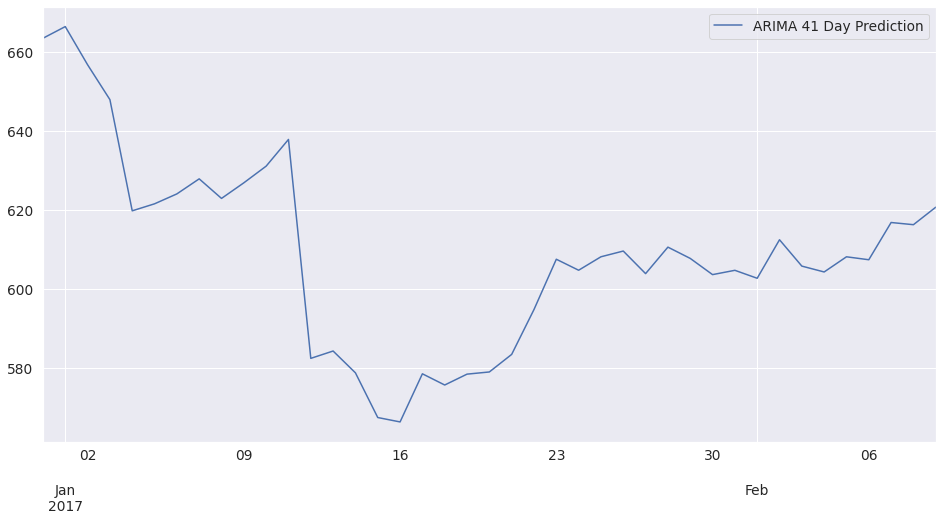

In [86]:
# ploting the prediction
predmc2.plot(figsize=(16,8),legend=True)


## For "Volume"

In [87]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Volume'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Volume   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10010.042
Method:                       css-mle   S.D. of innovations        2015586.540
Date:                Tue, 10 May 2022   AIC                          20028.084
Time:                        19:10:14   BIC                          20045.854
Sample:                             1   HQIC                         20034.987
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5232.4632    913.297     -5.729      0.000   -7022.493   -3442.433
ar.L1.D.Volume     0.5168      0.034     15.048      0.000       0.449       0.584
ma.L1.D.Volume    -0.9999      0.007   -152.172      0.000      -1.013      -0.987
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9350           +0.0000j            1.9350            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [88]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

,0
Date,
2012-01-04,-1.625868e+06
2012-01-05,4.533106e+05
2012-01-06,-1.251336e+06
2012-01-09,5.850008e+06
2012-01-10,-1.078621e+06


<Figure size 1584x720 with 0 Axes>

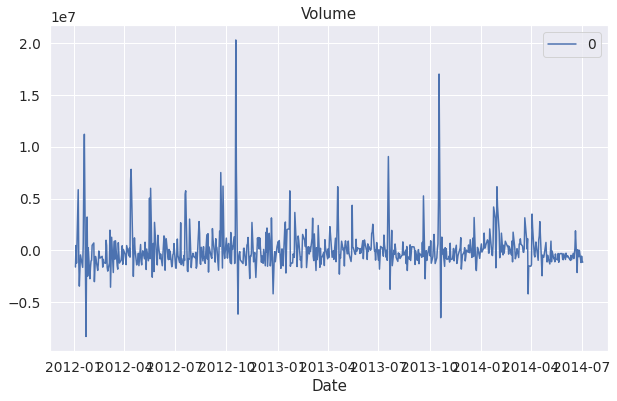

In [89]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Volume')
plt.show()

In [90]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=googledata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2014-07-07    1.699563e+06
2014-07-08    2.206307e+06
2014-07-09    2.465656e+06
2014-07-10    2.597155e+06
2014-07-11    2.662584e+06
                  ...     
2016-12-23   -5.059734e+05
2016-12-27   -5.112059e+05
2016-12-28   -5.164384e+05
2016-12-29   -5.216708e+05
2016-12-30   -5.269033e+05
Length: 629, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


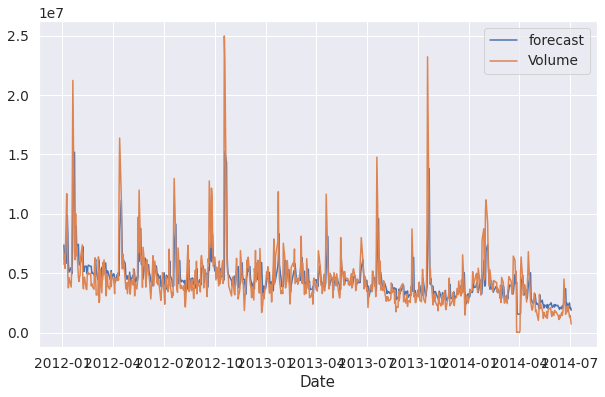

In [91]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [92]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['Volume'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
   # minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['Volume'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr 
            })
           # , 'minmax':minmax})
                


model_accuracy(pred, test_data['Volume'])



MSE: 2372353578997.4346


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.7881744849529306,
 'corr': 0.05351541437652896,
 'mae': 1192066.3669694844,
 'mape': 0.6496013509068157,
 'me': -798788.6107708756,
 'mpe': -0.33868008062684196,
 'rmse': 1540244.6490728133}

In [93]:
modelv2=ARIMA(train_data['Volume'],order=(1,1,1))
modelv2=modelv2.fit()
googledata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,623400.0
2016-12-27,790.68,797.86,787.66,791.55,789100.0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0
2016-12-29,783.33,785.93,778.92,782.79,744300.0
2016-12-30,782.75,782.78,770.41,771.82,1770000.0


In [94]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2016-12-31',end='2017-02-09')
#print(index_future_dates)
predmv2=modelv2.predict(start=1,end=41,typ='levels').rename('ARIMA 41 Day Prediction')
predmv2.index=index_future_dates
print(predmv2)

2016-12-31    7.375268e+06
2017-01-01    6.136989e+06
2017-01-02    6.657236e+06
2017-01-03    5.838792e+06
2017-01-04    9.902621e+06
2017-01-05    8.287082e+06
2017-01-06    5.834595e+06
2017-01-07    5.083503e+06
2017-01-08    5.488682e+06
2017-01-09    4.936831e+06
2017-01-10    5.864837e+06
2017-01-11    1.001906e+07
2017-01-12    1.518810e+07
2017-01-13    7.237380e+06
2017-01-14    6.800013e+06
2017-01-15    8.978847e+06
2017-01-16    7.018117e+06
2017-01-17    7.433633e+06
2017-01-18    5.965600e+06
2017-01-19    5.692680e+06
2017-01-20    5.830475e+06
2017-01-21    5.884738e+06
2017-01-22    6.683193e+06
2017-01-23    7.237800e+06
2017-01-24    5.476332e+06
2017-01-25    5.144928e+06
2017-01-26    5.566239e+06
2017-01-27    5.596635e+06
2017-01-28    5.003519e+06
2017-01-29    4.944948e+06
2017-01-30    5.585619e+06
2017-01-31    5.677239e+06
2017-02-01    5.568150e+06
2017-02-02    5.582269e+06
2017-02-03    5.002743e+06
2017-02-04    5.068473e+06
2017-02-05    4.911849e+06
2

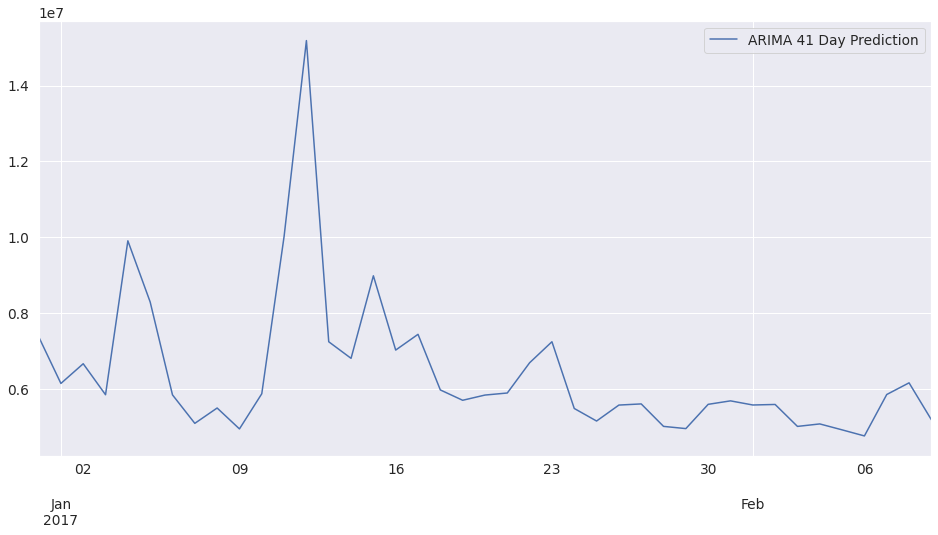

In [95]:
# ploting the prediction
predmv2.plot(figsize=(16,8),legend=True)


# VAR Model

## Configration and Training Model

In [96]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR


In [97]:
model = VAR(endog=train_data)
model_trained = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [98]:
# save model
model_trained.save('unilevermodel.pkl')

## Testing

In [99]:
predictions = model_trained.forecast(model_trained.y, steps=len(test_data))
predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[5.83368316e+02, 5.86772891e+02, 5.77981932e+02, 5.90608948e+02,
        9.43339061e+05],
       [5.83972878e+02, 5.88118955e+02, 5.77600076e+02, 5.93000472e+02,
        1.28857027e+06],
       [5.84404191e+02, 5.88805383e+02, 5.77618235e+02, 5.93713380e+02,
        1.53248318e+06],
       ...,
       [6.83755115e+02, 6.89160851e+02, 6.74505149e+02, 4.69276146e+02,
        2.88086130e+05],
       [6.83862015e+02, 6.89268706e+02, 6.74609656e+02, 4.69123417e+02,
        2.86336345e+05],
       [6.83968785e+02, 6.89376430e+02, 6.74714035e+02, 4.68970860e+02,
        2.84588652e+05]])

In [100]:
import pandas as pd

In [101]:
test_data.index

Index([2014-07-07, 2014-07-08, 2014-07-09, 2014-07-10, 2014-07-11, 2014-07-14,
       2014-07-15, 2014-07-16, 2014-07-17, 2014-07-18,
       ...
       2016-12-16, 2016-12-19, 2016-12-20, 2016-12-21, 2016-12-22, 2016-12-23,
       2016-12-27, 2016-12-28, 2016-12-29, 2016-12-30],
      dtype='object', name='Date', length=629)

In [102]:
forcasted_results = pd.DataFrame(predictions)
forcasted_results.head(12)
forcasted_results.index = test_data.index
forcasted_results.head(12)

,0,1,2,3,4
Date,,,,,
2014-07-07,583.368316,586.772891,577.981932,590.608948,9.433391e+05
2014-07-08,583.972878,588.118955,577.600076,593.000472,1.288570e+06
2014-07-09,584.404191,588.805383,577.618235,593.713380,1.532483e+06
2014-07-10,584.730214,589.225153,577.766936,593.839252,1.677442e+06
2014-07-11,585.004100,589.535118,577.960050,593.756789,1.756562e+06
2014-07-14,585.251615,589.797710,578.168271,593.598136,1.797297e+06
2014-07-15,585.485772,590.039020,578.381626,593.410533,1.816999e+06
2014-07-16,585.713108,590.270400,578.596673,593.211366,1.825561e+06
2014-07-17,585.936905,590.496968,578.812199,593.007266,1.828339e+06


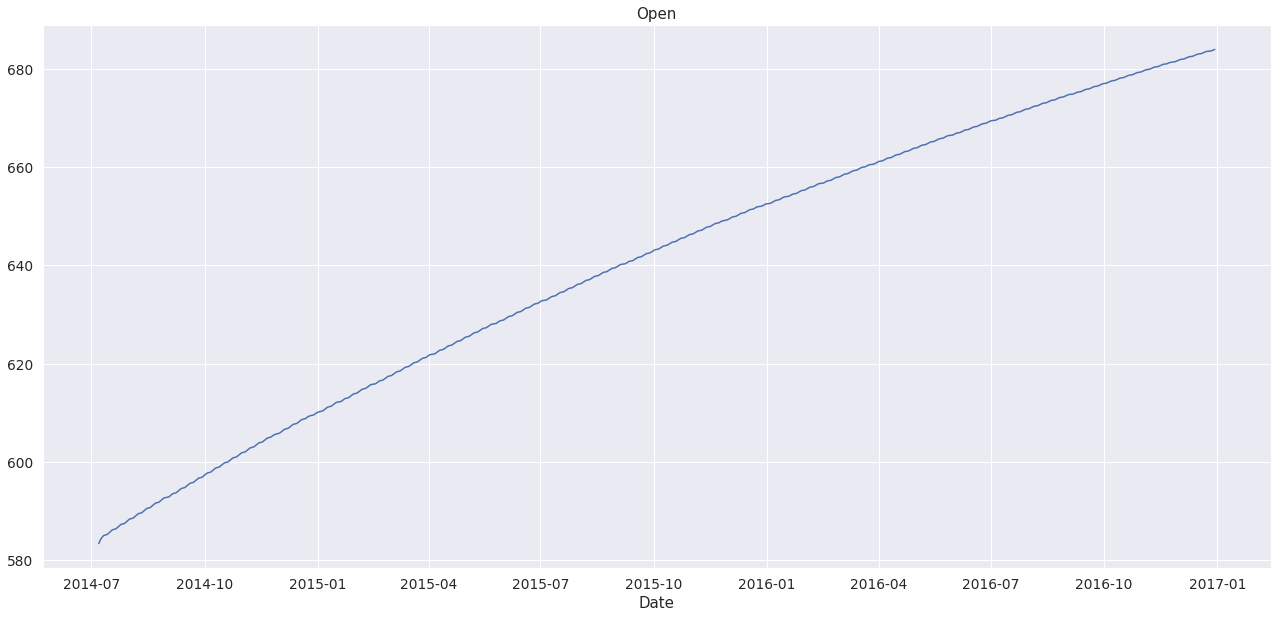

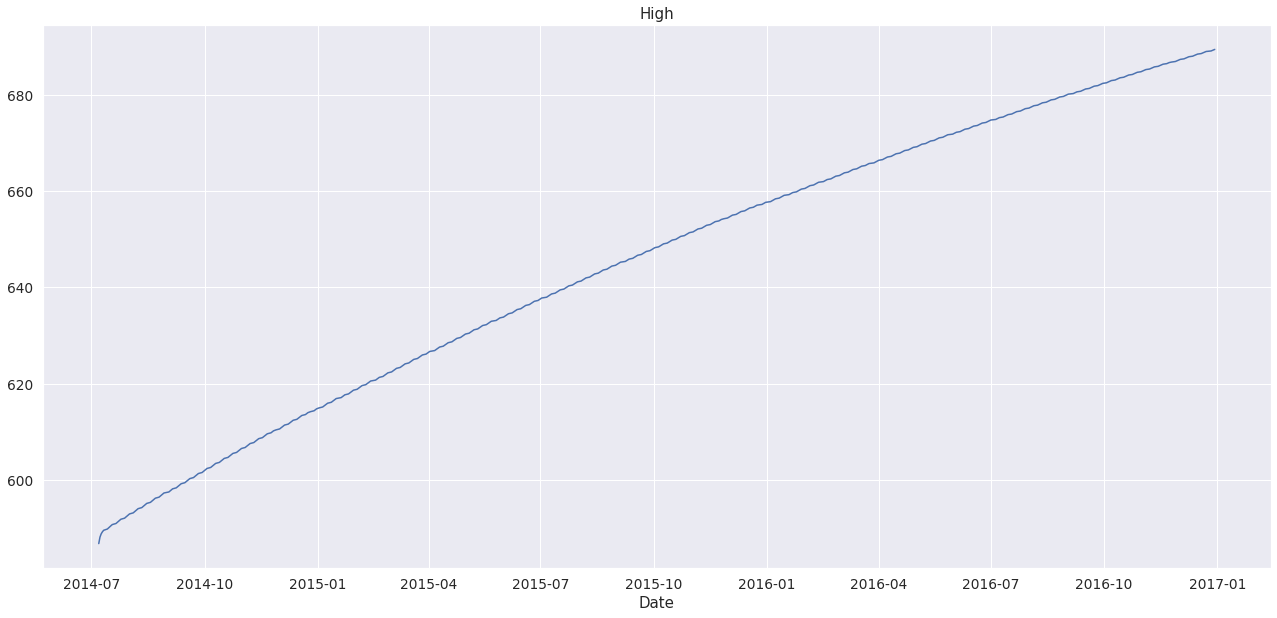

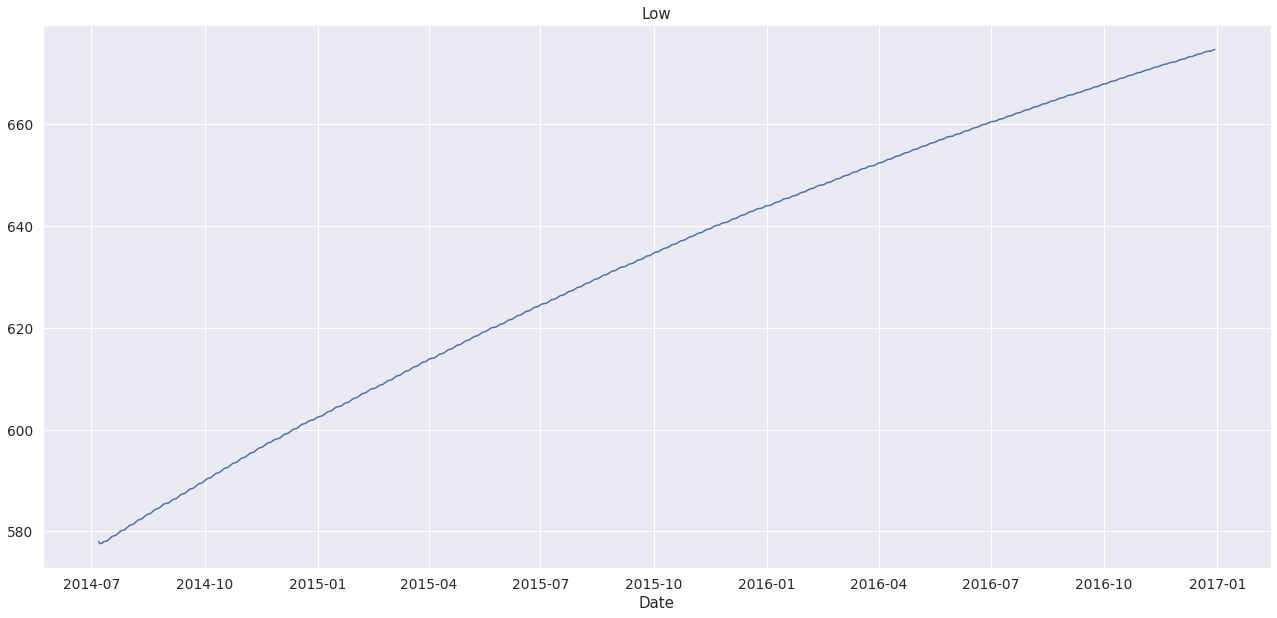

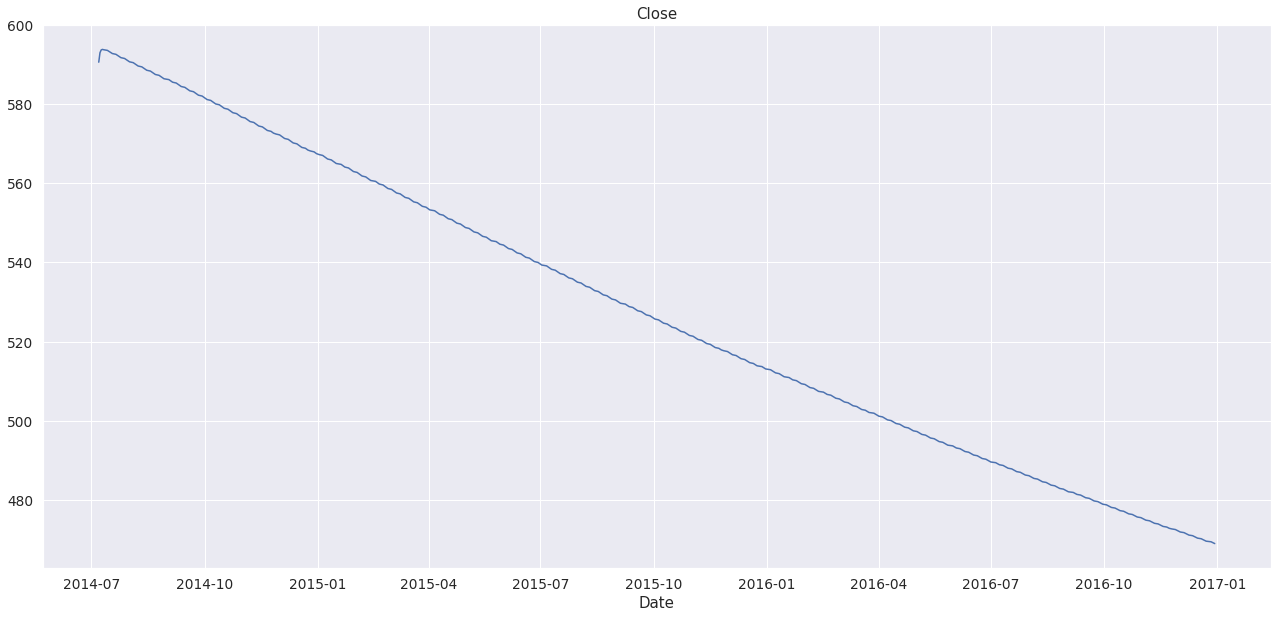

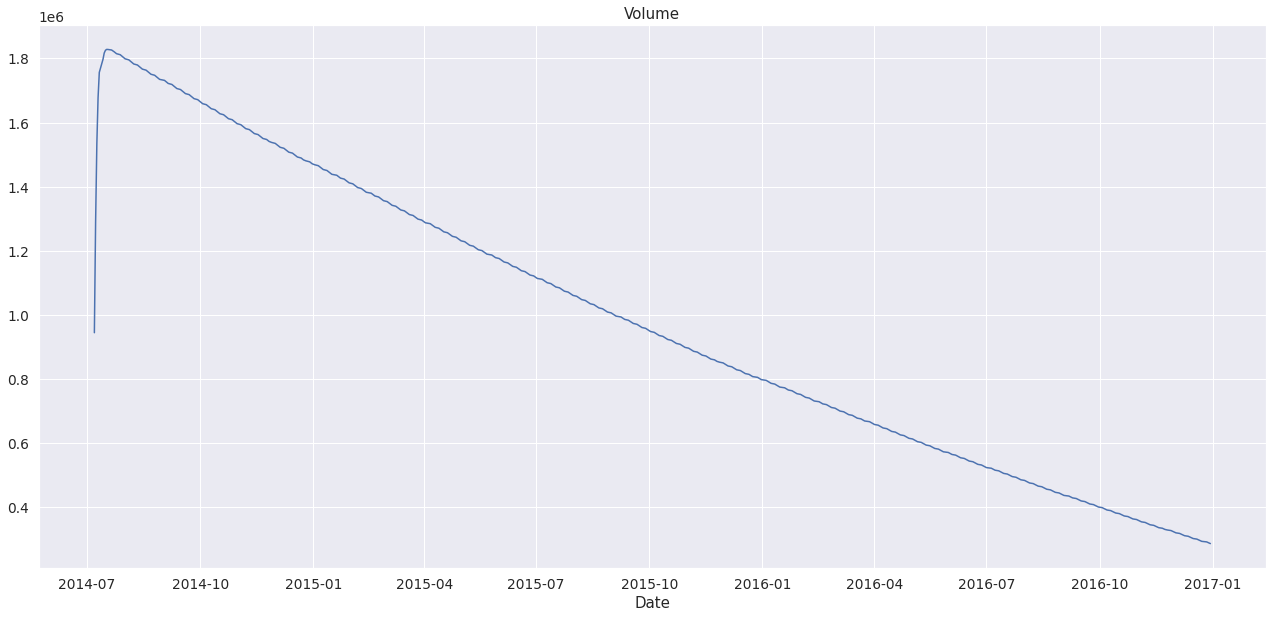

In [103]:
forcasted_results.columns=['Open', 'High', 'Low', 'Close','Volume']
columnnames=list(forcasted_results.columns)
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  forcasted_results[columnname].plot()
  plt.title(columnname)
  plt.show()

## Model Performance Visualization

In [104]:
model_trained.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 10, May, 2022
Time:                     19:10:19
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    42.2253
Nobs:                     628.000    HQIC:                   42.0955
Log likelihood:          -17617.6    FPE:                1.76215e+18
AIC:                      42.0131    Det(Omega_mle):     1.68033e+18
--------------------------------------------------------------------
Results for equation Open
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -1.862180         0.877105           -2.123           0.034
L1.Open          -0.654194         0.058403          -11.201           0.000
L1.High           0.826866         0.067652           12.222           0.000


##Final Model

In [105]:
model = VAR(endog=ts)
model_trained = model.fit()
# save model
model_trained.save('unilevermodel.pkl')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


# Test Results

## VAR Results

In [106]:
import pickle
# load model
with open('unilevermodel.pkl', 'rb') as pickle_file:
    loaded_model = pickle.load(pickle_file)

In [107]:
forcasted_results=loaded_model.forecast(model_trained.y, steps=len(test_data)) # test_data must be one row of information as-is, meaning, as it originally appears in the dataset provided for training. 
print(forcasted_results)

[[7.73312882e+02 7.79020512e+02 7.66314228e+02 7.69808957e+02
  1.58171373e+06]
 [7.73228930e+02 7.79042126e+02 7.66286397e+02 7.68997057e+02
  1.46161293e+06]
 [7.73276038e+02 7.79100256e+02 7.66339823e+02 7.68181819e+02
  1.39774390e+06]
 ...
 [8.15809237e+02 8.22211903e+02 8.08267301e+02 6.40910142e+02
  5.16833532e+05]
 [8.15862771e+02 8.22265896e+02 8.08320267e+02 6.40880402e+02
  5.16275532e+05]
 [8.15916252e+02 8.22319836e+02 8.08373182e+02 6.40850751e+02
  5.15718293e+05]]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [108]:
#converting predictions to dataframe
test_list=['2017-04-13', '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21','2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28']
inputdata = pd.DataFrame(test_list)
inputdata.columns =['testdata']
print(inputdata)
inputdata['testdata']=inputdata['testdata'].astype('str').map(lambda x: x.lower())
testsamplerequired = pd.to_datetime(inputdata['testdata']).dt.date
print(testsamplerequired)
forcasted_results=loaded_model.forecast(loaded_model.y, steps=len(testsamplerequired)) # test_data must be one row of information as-is, meaning, as it originally appears in the dataset provided for training. 
print(forcasted_results)

     testdata
0  2017-04-13
1  2017-04-17
2  2017-04-18
3  2017-04-19
4  2017-04-20
5  2017-04-21
6  2017-04-25
7  2017-04-26
8  2017-04-27
9  2017-04-28
0    2017-04-13
1    2017-04-17
2    2017-04-18
3    2017-04-19
4    2017-04-20
5    2017-04-21
6    2017-04-25
7    2017-04-26
8    2017-04-27
9    2017-04-28
Name: testdata, dtype: object
[[7.73312882e+02 7.79020512e+02 7.66314228e+02 7.69808957e+02
  1.58171373e+06]
 [7.73228930e+02 7.79042126e+02 7.66286397e+02 7.68997057e+02
  1.46161293e+06]
 [7.73276038e+02 7.79100256e+02 7.66339823e+02 7.68181819e+02
  1.39774390e+06]
 [7.73333521e+02 7.79159828e+02 7.66404749e+02 7.67365579e+02
  1.36274387e+06]
 [7.73396330e+02 7.79222879e+02 7.66472969e+02 7.66554017e+02
  1.34264400e+06]
 [7.73462261e+02 7.79289136e+02 7.66541893e+02 7.65748662e+02
  1.33033525e+06]
 [7.73530024e+02 7.79357733e+02 7.66610773e+02 7.64949633e+02
  1.32214862e+06]
 [7.73598877e+02 7.79427888e+02 7.66679479e+02 7.64156680e+02
  1.31616649e+06]
 [7.73668391e+02

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [109]:
import pandas as pd

In [110]:
forcasted_results = pd.DataFrame(forcasted_results)
forcasted_results['Date']=testsamplerequired
forcasted_results.set_index('Date', inplace = True) #Set the date to the index
forcasted_results.head(12)

,0,1,2,3,4
Date,,,,,
2017-04-13,773.312882,779.020512,766.314228,769.808957,1.581714e+06
2017-04-17,773.228930,779.042126,766.286397,768.997057,1.461613e+06
2017-04-18,773.276038,779.100256,766.339823,768.181819,1.397744e+06
2017-04-19,773.333521,779.159828,766.404749,767.365579,1.362744e+06
2017-04-20,773.396330,779.222879,766.472969,766.554017,1.342644e+06
2017-04-21,773.462261,779.289136,766.541893,765.748662,1.330335e+06
2017-04-25,773.530024,779.357733,766.610773,764.949633,1.322149e+06
2017-04-26,773.598877,779.427888,766.679479,764.156680,1.316166e+06
2017-04-27,773.668391,779.499041,766.748057,763.369522,1.311376e+06


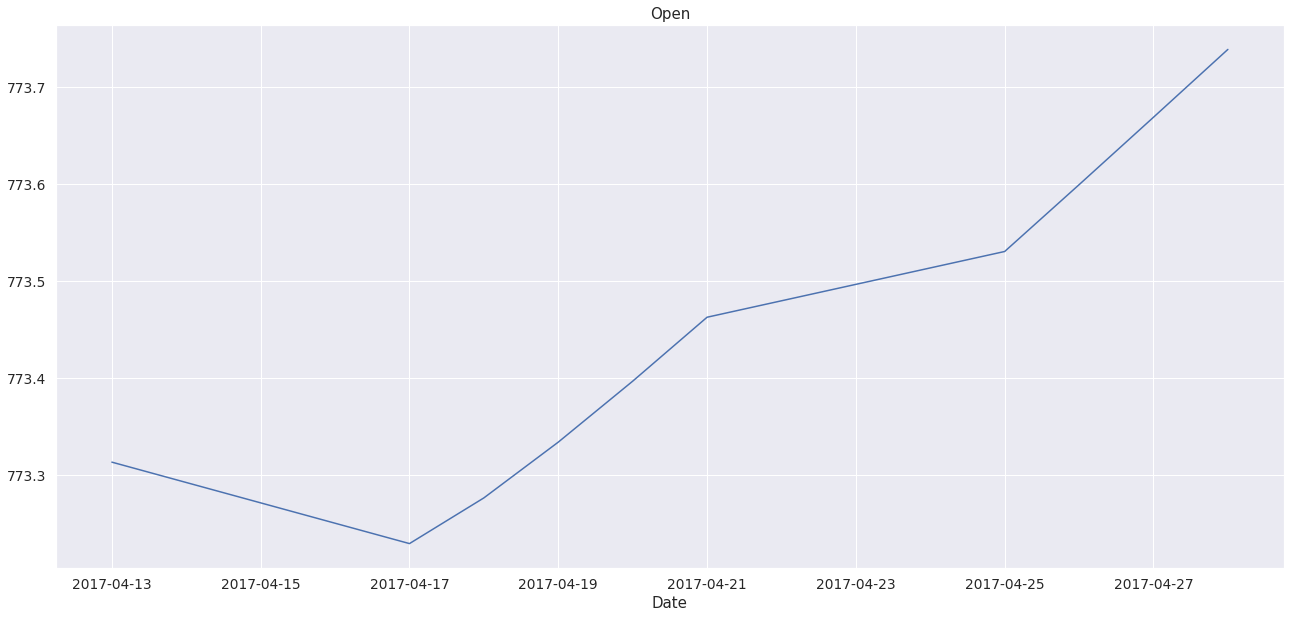

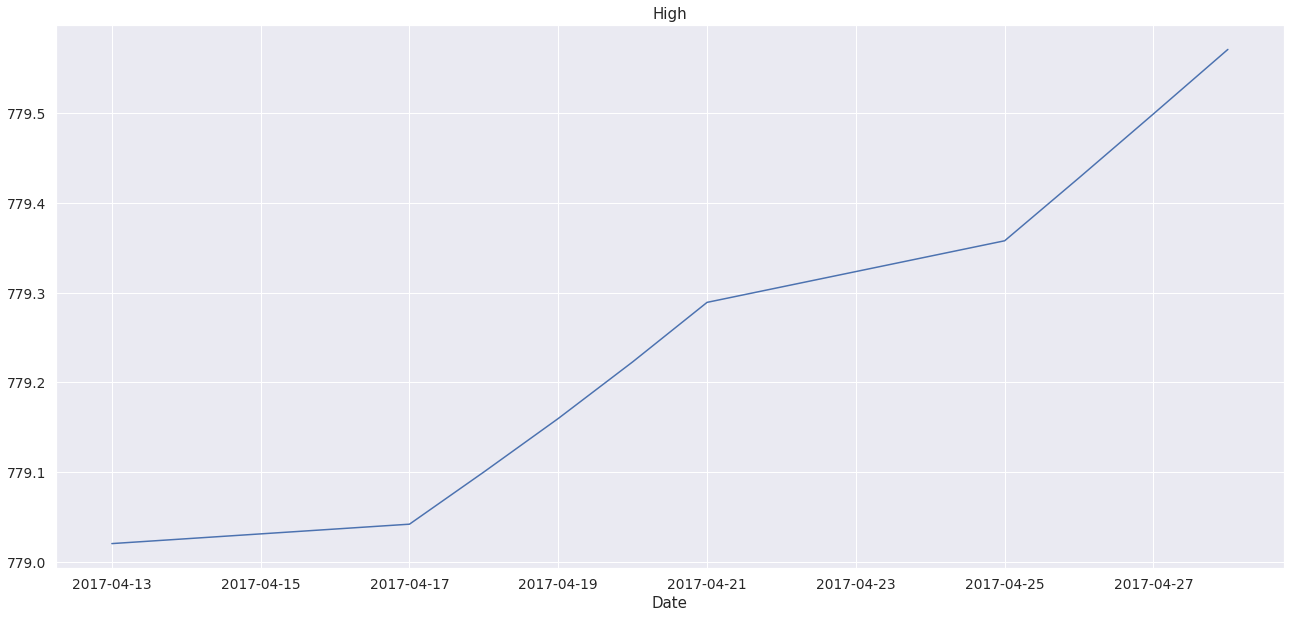

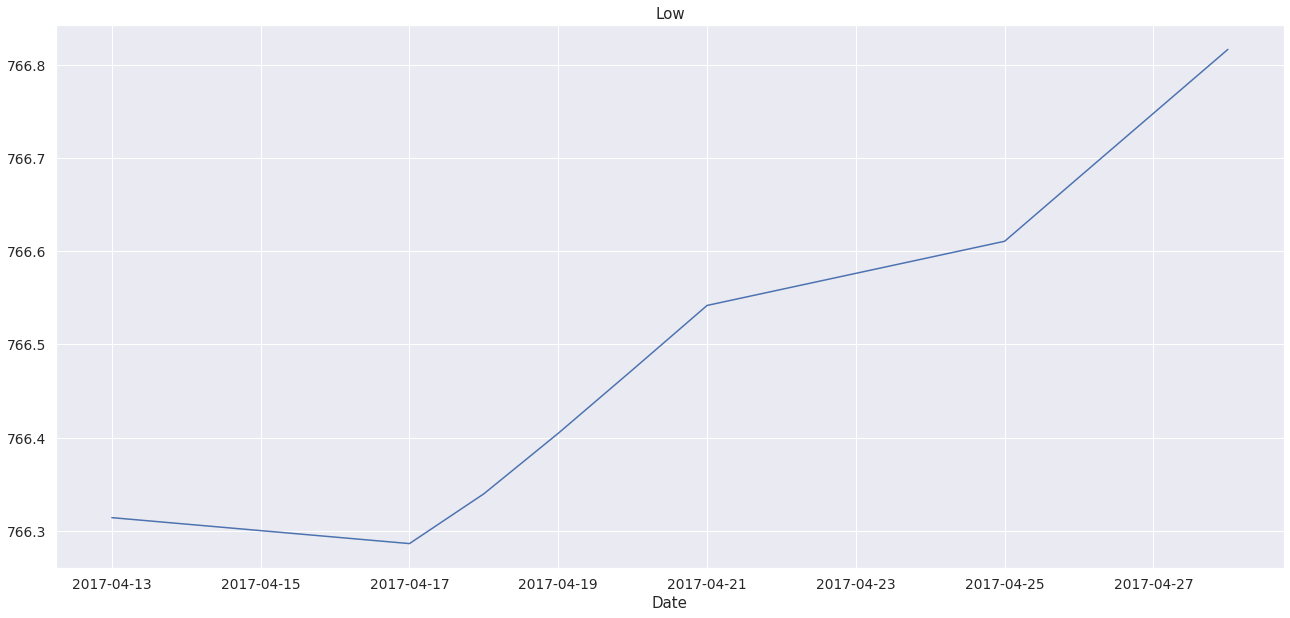

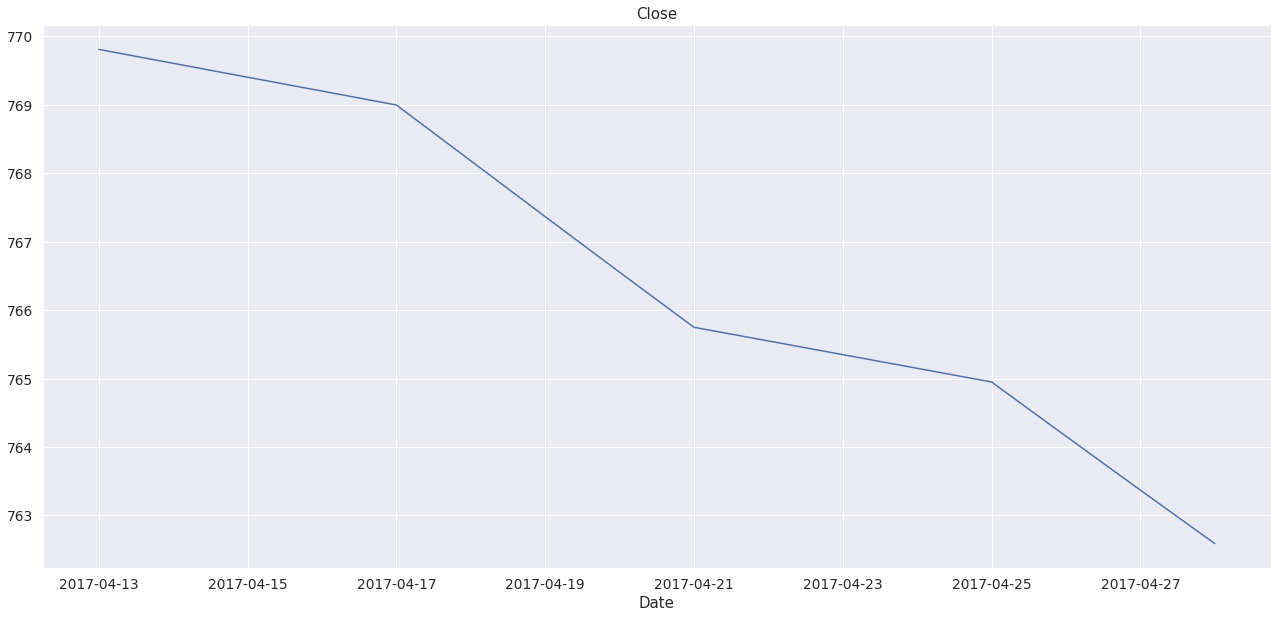

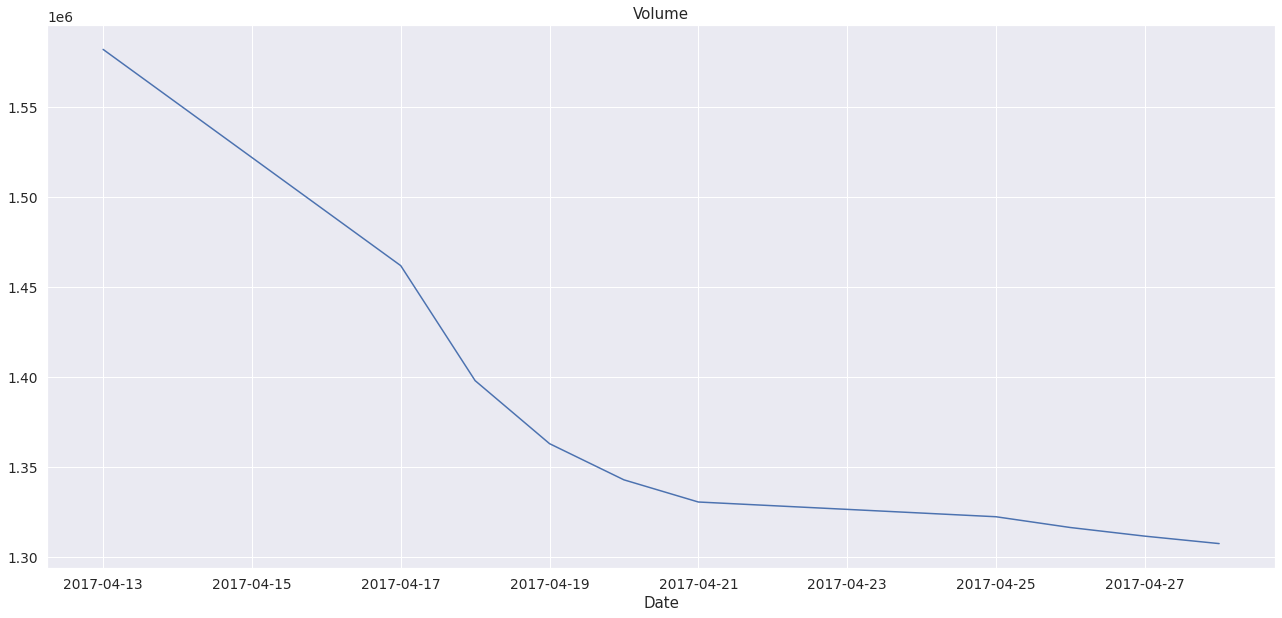

In [111]:
forcasted_results.columns=['Open', 'High', 'Low', 'Close','Volume']
columnnames=list(forcasted_results.columns)
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  forcasted_results[columnname].plot()
  plt.title(columnname)
  plt.show()

In [112]:
forcasted_results

,Open,High,Low,Close,Volume
Date,,,,,
2017-04-13,773.312882,779.020512,766.314228,769.808957,1.581714e+06
2017-04-17,773.228930,779.042126,766.286397,768.997057,1.461613e+06
2017-04-18,773.276038,779.100256,766.339823,768.181819,1.397744e+06
2017-04-19,773.333521,779.159828,766.404749,767.365579,1.362744e+06
2017-04-20,773.396330,779.222879,766.472969,766.554017,1.342644e+06
2017-04-21,773.462261,779.289136,766.541893,765.748662,1.330335e+06
2017-04-25,773.530024,779.357733,766.610773,764.949633,1.322149e+06
2017-04-26,773.598877,779.427888,766.679479,764.156680,1.316166e+06
2017-04-27,773.668391,779.499041,766.748057,763.369522,1.311376e+06


In [113]:
dataset_path = 'https://raw.githubusercontent.com/deisepureza/TheRocksPrediction/main/Microsoft_2015-2021.csv'
df = pd.read_csv(dataset_path)
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [114]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [115]:
start_date = pd.to_datetime("2017-04-12").date()
end_date = pd.to_datetime("2017-04-28").date()
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
  
df1 = df.loc[mask]
display(df1)

,Date,Open,High,Low,Close,Volume
513,2017-04-13,65.29,65.86,64.95,64.95,17896483
514,2017-04-17,65.04,65.49,65.01,65.48,16689265
515,2017-04-18,65.33,65.71,65.16,65.39,15155611
516,2017-04-19,65.65,65.75,64.89,65.04,26992771
517,2017-04-20,65.46,65.75,65.14,65.50,22299477
518,2017-04-21,65.67,66.70,65.45,66.40,32522645
519,2017-04-24,67.48,67.66,67.10,67.53,29769976
520,2017-04-25,67.90,68.04,67.60,67.92,30242730
521,2017-04-26,68.08,68.31,67.62,67.83,26190770
522,2017-04-27,68.15,68.38,67.58,68.27,34970953


In [116]:
var_testdata= df1.drop(index=[519])
var_testdata

,Date,Open,High,Low,Close,Volume
513,2017-04-13,65.29,65.86,64.95,64.95,17896483
514,2017-04-17,65.04,65.49,65.01,65.48,16689265
515,2017-04-18,65.33,65.71,65.16,65.39,15155611
516,2017-04-19,65.65,65.75,64.89,65.04,26992771
517,2017-04-20,65.46,65.75,65.14,65.50,22299477
518,2017-04-21,65.67,66.70,65.45,66.40,32522645
520,2017-04-25,67.90,68.04,67.60,67.92,30242730
521,2017-04-26,68.08,68.31,67.62,67.83,26190770
522,2017-04-27,68.15,68.38,67.58,68.27,34970953
523,2017-04-28,68.91,69.14,67.69,68.46,39548818


In [117]:
var_testdata.set_index('Date', inplace = True)
var_testdata



,Open,High,Low,Close,Volume
Date,,,,,
2017-04-13,65.29,65.86,64.95,64.95,17896483
2017-04-17,65.04,65.49,65.01,65.48,16689265
2017-04-18,65.33,65.71,65.16,65.39,15155611
2017-04-19,65.65,65.75,64.89,65.04,26992771
2017-04-20,65.46,65.75,65.14,65.50,22299477
2017-04-21,65.67,66.70,65.45,66.40,32522645
2017-04-25,67.90,68.04,67.60,67.92,30242730
2017-04-26,68.08,68.31,67.62,67.83,26190770
2017-04-27,68.15,68.38,67.58,68.27,34970953


In [118]:



def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
  

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})







In [119]:
print('Google VAR Model Accuracy of column Open')

model_accuracy(forcasted_results['Open'], var_testdata['Open'])


Google VAR Model Accuracy of column Open


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': 0.9462253668494832,
 'mae': 706.9065581251498,
 'mape': 10.62776623528249,
 'me': 706.9065581251498,
 'minmax': 0.9139604090126203,
 'mpe': 10.62776623528249,
 'rmse': 706.9077054465339}

In [120]:
print('Google VAR Model Accuracy of column High')

model_accuracy(forcasted_results['High'], var_testdata['High'])

Google VAR Model Accuracy of column High


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': 0.946025659667767,
 'mae': 712.3560231036006,
 'mape': 10.650513273902664,
 'me': 712.3560231036006,
 'minmax': 0.9141340061668288,
 'mpe': 10.650513273902664,
 'rmse': 712.3569641512211}

In [121]:

print('Google VAR Model Accuracy of column Low')

model_accuracy(forcasted_results['Low'], var_testdata['Low'])

Google VAR Model Accuracy of column Low


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': 0.9083763469451693,
 'mae': 700.4124950898553,
 'mape': 10.598847150101616,
 'me': 700.4124950898553,
 'minmax': 0.9137548774650962,
 'mpe': 10.598847150101616,
 'rmse': 700.4133347661952}

In [122]:
print('Google VAR Model Accuracy of column Close')

model_accuracy(forcasted_results['Close'], var_testdata['Close'])

Google VAR Model Accuracy of column Close


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': -0.9295961079670668,
 'mae': 699.6479863457113,
 'mape': 10.522693645191351,
 'me': 699.6479863457113,
 'minmax': 0.913167771855062,
 'mpe': 10.522693645191351,
 'rmse': 699.6572973908418}

In [123]:
print('Google VAR Model Accuracy of column Volume')

model_accuracy(forcasted_results['Volume'], var_testdata['Volume'])

Google VAR Model Accuracy of column Volume


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': -0.715786142109773,
 'mae': 24877580.200900234,
 'mape': 0.9415690770664181,
 'me': -24877580.200900234,
 'minmax': 0.9415690770664182,
 'mpe': -0.9415690770664181,
 'rmse': 26090057.389262926}